# Transform county data on professions into county data on skill levels

1. Load data and set it up
2. Prepare dictionary and helper function
3. Transform data and save it

# 1. Load Data

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#libraries
import re
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt

**Set up File Paths**
1. Loading
2. Saving

**Loading**

In [3]:
# Set up paths (load files from Classification folder)
classification_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.1 Classification Data"

# Set up path to control variables 
path_control_df = r"C:\Users\soere\OneDrive\Desktop\Python MA\0. Pretransformed Data"

# Set up path to ifo (iPEHD) files
ifo_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.3 ifo Data"

# Load data
occupation_detailed_df = pd.read_stata(f"{classification_path}\occupation_detailed.dta")
control_df = pd.read_stata(f"{path_control_df}\control.dta")

**Saving**

In [4]:
saving_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\2.2 Saving the Dependent Variables"

#### Quick Transformation and Merger

In [5]:
# Make a new column where we add up male and female
occupation_detailed_df.loc[:, "d_Hauptberuf"] = occupation_detailed_df["d_Hauptberuf_m"] + occupation_detailed_df["d_Hauptberuf_w"]

In [6]:
# Since we only have data on the Regierungsbezirk level we need to find the id

# Merge the DataFrames on the 'id_inequality' column
occupation_detailed_df = pd.merge(occupation_detailed_df, control_df[["id_inequality", "rb_id"]], on="id_inequality", how="left")

# Give new columns for skills
occupation_detailed_df["high"] = ""
occupation_detailed_df["medium"] = ""
occupation_detailed_df["low"] = ""
occupation_detailed_df["unskilled"] = ""
occupation_detailed_df["intermediate"] = 0

# Show the first few rows of the merged DataFrame to confirm the inclusion of 'rb_id'
occupation_detailed_df.head(-5)

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
0,1.0,A,1,6541.0,5786.0,12327.0,17.0,,,,,0
1,1.0,A,2,38.0,10.0,48.0,17.0,,,,,0
2,1.0,A,4,69.0,100.0,169.0,17.0,,,,,0
3,1.0,A,5,397.0,110.0,507.0,17.0,,,,,0
4,1.0,A,6,187.0,36.0,223.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80879,702.0,E,1,4.0,0.0,4.0,31.0,,,,,0
80880,702.0,E,2,41.0,3.0,44.0,31.0,,,,,0
80881,702.0,E,3,34.0,0.0,34.0,31.0,,,,,0
80882,702.0,E,4,40.0,8.0,48.0,31.0,,,,,0


In [7]:
control_df

,id_inequality,rb_id,rb_name,province_id,s_industry,s_prot,s_german,longitud,latitud,slope_km,soil_suitability,mean_temp,mean_preci,dist_100km,log_distance_carbon_c
0,1.0,17.0,Koenigsberg,1.0,18.515817,93.379268,54.543988,21.261999,55.648117,0.039,3.466667,7.255,64.419,0.330,4.272285
1,2.0,17.0,Koenigsberg,1.0,20.088563,96.752059,100.585163,20.249264,54.843463,0.041,3.272727,7.703,63.562,0.101,5.116106
2,4.0,17.0,Koenigsberg,1.0,35.498406,91.659959,76.561623,20.503550,54.706534,0.041,2.000000,7.983,66.168,0.040,5.181000
3,5.0,17.0,Koenigsberg,1.0,15.060419,97.782661,137.406224,20.646094,54.737281,0.039,2.052632,7.516,65.371,0.009,5.153863
4,6.0,17.0,Koenigsberg,1.0,12.007056,98.668155,89.333490,21.267903,54.855057,0.038,2.050000,7.287,61.743,0.119,5.070227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,1.0,Aachen,12.0,15.278715,1.613553,64.254487,6.167253,50.364714,0.143,2.785714,7.611,93.091,0.724,3.452736
571,699.0,31.0,Sigmaringen,12.0,19.492555,5.190840,93.931298,9.235305,48.006617,0.165,1.375000,7.392,73.282,0.250,4.136785
572,700.0,31.0,Sigmaringen,12.0,23.974037,2.518404,99.023634,9.198332,48.235600,0.186,1.000000,6.673,78.484,0.419,4.088633
573,701.0,31.0,Sigmaringen,12.0,30.325834,6.910838,88.408480,9.001089,48.317343,0.182,1.000000,7.312,74.583,0.376,3.776254


In [8]:
rb_2_pro = control_df.groupby("province_id")["rb_id"].apply(lambda x: list(set(x))).reset_index()
rb_2_pro

,province_id,rb_id
0,1.0,"[17.0, 11.0]"
1,2.0,"[22.0, 7.0]"
2,3.0,"[10.0, 4.0, 29.0]"
3,4.0,"[33.0, 18.0, 34.0]"
4,5.0,"[28.0, 6.0]"
5,6.0,"[26.0, 19.0, 5.0]"
6,7.0,"[9.0, 21.0, 23.0]"
7,8.0,[30.0]
8,9.0,"[32.0, 3.0, 12.0, 13.0, 20.0, 27.0]"
9,10.0,"[24.0, 25.0, 2.0]"


["Allenstein", "Neidenburg", "Ortelsburg", "Osterode Ostpreussen", "Roessel", 
              "Sensburg", "Johannisburg", "Loetzen", "Lyck"]

In [9]:
# Give counties of newly (in 1907) formed Allenstein its own rb_id and rb_name

counties_Allenstein = [15, 16, 19, 20, 21, 40, 41, 42, 43]
occupation_detailed_df.loc[occupation_detailed_df["id_inequality"].isin(counties_Allenstein) , "rb_id"] = 37

In [10]:
occupation_detailed_df.dtypes, control_df.dtypes

(id_inequality       float64
 i_Grossbuchstabe     object
 i_Ziffer              int16
 d_Hauptberuf_m      float64
 d_Hauptberuf_w      float64
 d_Hauptberuf        float64
 rb_id               float64
 high                 object
 medium               object
 low                  object
 unskilled            object
 intermediate          int64
 dtype: object,
 id_inequality            float64
 rb_id                    float64
 rb_name                   object
 province_id              float64
 s_industry               float64
 s_prot                   float64
 s_german                 float64
 longitud                 float64
 latitud                  float64
 slope_km                 float64
 soil_suitability         float64
 mean_temp                float64
 mean_preci               float64
 dist_100km               float64
 log_distance_carbon_c    float64
 dtype: object)

# Prepare dictionary

In [11]:
# Read the HISCLASS.do file and extract lines
with open(f"{classification_path}\HISCLASS.do") as file:
    lines = file.readlines()

# Make a dictionary
# Regular expression to capture HISCO code and its class
pattern = r"\((\d{5})=(\d+)\)"

# Extract all the mappings from the lines
mappings = {}
for line in lines:
    matches = re.findall(pattern, line)
    for hisco_code, hisco_class in matches:
        mappings[hisco_code] = int(hisco_class)

# Convert all values in the mappings dictionary to strings
mappings = {key: str(value) for key, value in mappings.items()}

mappings

{'99997': '1',
 '99998': '1',
 '01110': '2',
 '01120': '2',
 '01130': '2',
 '01140': '2',
 '01150': '2',
 '01190': '2',
 '01210': '2',
 '01220': '2',
 '01230': '2',
 '01240': '2',
 '01250': '2',
 '01260': '2',
 '01270': '2',
 '01280': '2',
 '01290': '2',
 '01320': '2',
 '01330': '2',
 '01340': '2',
 '01350': '2',
 '01390': '2',
 '01400': '4',
 '01420': '4',
 '01430': '4',
 '01490': '4',
 '02000': '2',
 '02120': '2',
 '02130': '2',
 '02140': '2',
 '02210': '2',
 '02220': '2',
 '02230': '2',
 '02235': '2',
 '02240': '2',
 '02245': '2',
 '02250': '2',
 '02255': '2',
 '02260': '4',
 '02290': '2',
 '02305': '2',
 '02310': '2',
 '02320': '2',
 '02330': '2',
 '02340': '2',
 '02390': '2',
 '02410': '2',
 '02420': '2',
 '02430': '2',
 '02440': '2',
 '02450': '2',
 '02460': '2',
 '02470': '2',
 '02480': '2',
 '02485': '2',
 '02490': '2',
 '02510': '2',
 '02520': '2',
 '02590': '2',
 '02620': '2',
 '02630': '2',
 '02690': '2',
 '02710': '2',
 '02720': '2',
 '02730': '2',
 '02740': '2',
 '02790': 

In [12]:
# Add the new HISCO title as some occupations had multiple skill levels
mappings["66666"] = "13"

In [13]:
value_exists_in_mappings = "66666" in mappings

mapping_value = mappings.get("66666", "Not found")

value_exists_in_mappings, mapping_value

(True, '13')

In [14]:
# Create a mapping dictionary for the Skills
skill_mappings = {
    "1": "high",
    "2": "high",
    "3": "medium",
    "4": "medium",
    "5": "low",
    "6": "medium",
    "7": "medium",
    "8": "medium",
    "9": "low",
    "10": "low",
    "11": "unskilled",
    "12": "unskilled",
    "13": "intermediate"} #for occupations with multiple skill levels

# Helper Functions

In [15]:
def replace_values_with_mappings(df, columns, mappings):

    """
    Replace the values in the specified columns of the DataFrame using the provided mappings dictionary.
    Also report any values that could not be replaced and their positions.
    Parameters:
    df (DataFrame): The DataFrame to modify
    columns (list): The list of columns to replace values in
    mappings (dict): The dictionary to use for the replacements

    Returns:
    DataFrame: The DataFrame with replaced values
    list: A list of tuples containing column names and index positions where values could not be replaced
    """
    not_replaced = []

    # Loop over each column

    for column in columns:
        # Loop over each row in the column
        for idx, value in enumerate(df[column]):
            try:
                # Try to replace the value using the mappings dictionary
                df.loc[idx, column] = mappings[value]
            except KeyError:
                # If the value is not in the mappings dictionary, record its position
                not_replaced.append((column, idx))          

    return df, not_replaced

In [16]:
def SkillCalculator(df_agri, df_A_Rest, status_cols, HISCO_cols, threshold_criteria = "Average_Firm_Size", threshold_lvl = 50):
    
    """
    This function performs several operations to update df_A_Rest based on the values in the DataFrame df_agri.
    The purpose is to use the distributional data on the status (e.g. uneducated laborer) and the corresponding
    HISCO, which was assigned by Hand, for each "Berufszweig" in the DataFrame df_agri.   
    1. It first calculates "_per" columns in the DataFrame, which are the proportions of each column
       related to the total sum of specific columns.
    2. The function then uses a threshold from the "Average_Firm_Size" column to decide how to 
       update df_A_Rest. If the average firm size is less than 50, it performs specific calculations
       to update skill levels ("high", "medium", "low", "unskilled") in df_A_Rest.

    Parameters:
    df_agri (DataFrame): Source DataFrame containing classifications and shares of occupations per profession.
    df_A_Rest (DataFrame): Orginal occupational data. Target DataFrame to be updated based on df_agri.

    Returns:
    df_agri (DataFrame): Updated source DataFrame with additional "_per" columns.
    df_A_Rest (DataFrame): Updated target DataFrame with skill level columns.
    """
    
    # Step 1: Create new "_per" columns
    cols_to_sum = status_cols
    df_agri["total"] = df_agri[cols_to_sum].sum(axis=1)
    for col in cols_to_sum:
        new_col_name = f"{col}_per"
        df_agri[new_col_name] = df_agri[col] / df_agri["total"]

    # Step 2: Convert "Average_Firm_Size" to float
    df_agri[threshold_criteria] = df_agri[threshold_criteria].astype(float)
    

    # Initialize empty columns in df_A_Rest
    df_A_Rest.loc[:, "high"] = 0
    df_A_Rest.loc[:, "medium"] = 0
    df_A_Rest.loc[:, "low"] = 0
    df_A_Rest.loc[:, "unskilled"] = 0

    # Step 3: Loop through each row in df_agri
    for idx, row in df_agri.iterrows():
        average_firm_size = row[threshold_criteria]
        special_case = row["Eindeutig_Identifizierbar"] == "Sonderfall"
        if average_firm_size < threshold_lvl and not special_case:
            # Calculate Handwerker
            handwerker_cols = [f"{col}_per" for col in cols_to_sum if col not in ["c3", "c1"]]
            handwerker = row[handwerker_cols].sum()
            print(f"Row {idx}: Calculated Handwerker as {handwerker} using columns {handwerker_cols}")
            
            # Calculate no Handwerker
            no_handwerker_cols = [f"{col}_per" for col in cols_to_sum if col in ["c3", "c1"]]
            no_handwerker = row[no_handwerker_cols].sum()
            print(f"Row {idx}: Calculated No_Handwerker as {no_handwerker} using columns {no_handwerker_cols}")
            
            # Find corresponding row(s) in df_A_Rest
            mask = (df_A_Rest["i_Grossbuchstabe"] == row["Letter"]) & (df_A_Rest["i_Ziffer"] == row["Number"])
            df_target_rows = df_A_Rest[mask]

            # Update df_A_Rest
            for target_idx, target_row in df_target_rows.iterrows():
                value_to_add = handwerker * target_row["d_Hauptberuf"]
                skill_level_c2 = row["c2_HISCO"]
                skill_level_c3 = row["c3_HISCO"]

                value_to_add_c3 = no_handwerker * target_row["d_Hauptberuf"]

                # Sum up the values if both c2_HISCO and c3_HISCO contain the same value
                df_A_Rest.loc[target_idx, skill_level_c2] += value_to_add
                df_A_Rest.loc[target_idx, skill_level_c3] += value_to_add_c3
        
         # New case for Average_Firm_Size >= 50

        else:
            # Find corresponding row(s) in df_A_Rest
            mask = (df_A_Rest["i_Grossbuchstabe"] == row["Letter"]) & (df_A_Rest["i_Ziffer"] == row["Number"])
            df_target_rows = df_A_Rest[mask]        

            # Columns to consider from a1 to c3, excluding c1
            cols_to_consider = HISCO_cols            

            # Update df_A_Rest based on these columns
            for target_idx, target_row in df_target_rows.iterrows():
                for col in cols_to_consider:
                    col_per = f"{col}_per"
                    skill_level = row[f"{col}_HISCO"]                   

                    # Special case: Include c1 as part of c2
                    if col == "c3":
                        value_to_add = (row["c3_per"] + row["c1_per"]) * target_row["d_Hauptberuf"]
                    else:
                        value_to_add = row[col_per] * target_row["d_Hauptberuf"]                        

                    df_A_Rest.loc[target_idx, skill_level] += value_to_add

    return df_agri, df_A_Rest

# Agriculture

In [17]:
# Filter the data so we only have the people working in agriculture

df_A = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"] == "A"]

# Then, from this filtered DataFrame, filter rows where "i_Ziffer" == 1

df_A_1 = df_A[df_A["i_Ziffer"] == 1]

df_A_Rest = occupation_detailed_df[(occupation_detailed_df["i_Grossbuchstabe"] == "A") & (occupation_detailed_df["i_Ziffer"].isin([2, 3, 5, 6]))]

# Display the final filtered DataFrame

df_A_1

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
0,1.0,A,1,6541.0,5786.0,12327.0,17.0,,,,,0
151,2.0,A,1,6958.0,2642.0,9600.0,17.0,,,,,0
278,4.0,A,1,775.0,541.0,1316.0,17.0,,,,,0
470,5.0,A,1,7888.0,4313.0,12201.0,17.0,,,,,0
580,6.0,A,1,8346.0,6940.0,15286.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80309,698.0,A,1,6929.0,4864.0,11793.0,1.0,,,,,0
80437,699.0,A,1,3807.0,3802.0,7609.0,31.0,,,,,0
80564,700.0,A,1,2647.0,300.0,2947.0,31.0,,,,,0
80672,701.0,A,1,3313.0,3884.0,7197.0,31.0,,,,,0


## **1. Agriculture** (df_A_1)

In [18]:
Agri_rb = pd.read_excel(f"{classification_path}\Agriculture_Regionalized.xlsx", dtype=str)
Agri_rb

,Regierungsbezirk,id,province,province_name,a1,a2,b,c,Summe,Fläche der Betriebe mit über 100ha
0,Aachen,1,12,Rheinprovinz,11414.10965504654,17162.89034495346,188,54922,83687,4.4
1,Allenstein,37,1,Ostpreußen,22358.079997615572,10659.92000238443,1157,107974,142149,30.8
2,Arnsberg,2,10,Westfalen,15318.370995750969,13712.629004249031,646,76458,106135,4.3
3,Aurich,3,9,Hannover,7328.028000770663,8724.971999229336,209,44926,61188,3.8
4,Breslau,5,6,Schlesien,33898.66478795318,24788.33521204682,4705,234295,297687,41.6
5,Bromberg,6,5,Posen,23026.96644018288,8972.033559817119,2593,142645,177237,44.4
6,Danzig,7,2,Westpreußen,17593.065254512927,7775.93474548707,1646,97352,124367,31.9
7,Düsseldorf,8,12,Rheinprovinz,16783.36947200784,17769.630527992158,570,92568,127691,3.1
8,Erfurt,9,7,Sachsen,10256.883651487682,8561.116348512318,436,52277,71531,15.6
9,Frankfurt,10,3,Brandenburg,33396.12918660287,24323.87081339713,2676,210002,270398,35.3


==> percentages für a1 (General Farmers, medium skilled) und a2 (Subistenzlandwirtschaft, low skilled)

In [19]:
#calculate the percentages

# for a1
Agri_rb["a1"] = Agri_rb["a1"].astype(float)
Agri_rb["Summe"] = Agri_rb["Summe"].astype(float)
Agri_rb["a1_per"] = Agri_rb["a1"] / Agri_rb["Summe"]

# for a2
Agri_rb["a2"] = Agri_rb["a2"].astype(float)
Agri_rb["Summe"] = Agri_rb["Summe"].astype(float)
Agri_rb["a2_per"] = Agri_rb["a2"] / Agri_rb["Summe"]

# for b
Agri_rb["b"] = Agri_rb["b"].astype(float)
Agri_rb["Summe"] = Agri_rb["Summe"].astype(float)
Agri_rb["b_per"] = Agri_rb["b"] / Agri_rb["Summe"]

# for c
Agri_rb["c"] = Agri_rb["c"].astype(float)
Agri_rb["Summe"] = Agri_rb["Summe"].astype(float)
Agri_rb["c_per"] = Agri_rb["c"] / Agri_rb["Summe"]

In [20]:
Agri_rb

,Regierungsbezirk,id,province,province_name,a1,a2,b,c,Summe,Fläche der Betriebe mit über 100ha,a1_per,a2_per,b_per,c_per
0,Aachen,1,12,Rheinprovinz,11414.109655,17162.890345,188.0,54922.0,83687.0,4.4,0.136390,0.205084,0.002246,0.656279
1,Allenstein,37,1,Ostpreußen,22358.079998,10659.920002,1157.0,107974.0,142149.0,30.8,0.157286,0.074991,0.008139,0.759583
2,Arnsberg,2,10,Westfalen,15318.370996,13712.629004,646.0,76458.0,106135.0,4.3,0.144329,0.129200,0.006087,0.720384
3,Aurich,3,9,Hannover,7328.028001,8724.971999,209.0,44926.0,61188.0,3.8,0.119763,0.142593,0.003416,0.734229
4,Breslau,5,6,Schlesien,33898.664788,24788.335212,4705.0,234295.0,297687.0,41.6,0.113874,0.083270,0.015805,0.787052
5,Bromberg,6,5,Posen,23026.966440,8972.033560,2593.0,142645.0,177237.0,44.4,0.129922,0.050622,0.014630,0.804826
6,Danzig,7,2,Westpreußen,17593.065255,7775.934745,1646.0,97352.0,124367.0,31.9,0.141461,0.062524,0.013235,0.782780
7,Düsseldorf,8,12,Rheinprovinz,16783.369472,17769.630528,570.0,92568.0,127691.0,3.1,0.131437,0.139161,0.004464,0.724938
8,Erfurt,9,7,Sachsen,10256.883651,8561.116349,436.0,52277.0,71531.0,15.6,0.143391,0.119684,0.006095,0.730830
9,Frankfurt,10,3,Brandenburg,33396.129187,24323.870813,2676.0,210002.0,270398.0,35.3,0.123507,0.089956,0.009897,0.776640


In [21]:
# Convert 'rb_id' in both DataFrames to string to ensure they have the same format

df_A_1["rb_id"] = df_A_1["rb_id"].astype(str)

Agri_rb["id"] = Agri_rb["id"].astype(str)

# Remove the '.0' from the 'rb_id' values in df_A_1
df_A_1["rb_id"] = df_A_1["rb_id"].str.replace('.0', '', regex=False)

# Perform the merge 
df_A_1 = pd.merge(df_A_1, Agri_rb[["id", "a1_per", "a2_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Show some rows
df_A_1.head()

C:\Users\soere\AppData\Local\Temp\ipykernel_16600\1274393717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_1["rb_id"] = df_A_1["rb_id"].astype(str)
C:\Users\soere\AppData\Local\Temp\ipykernel_16600\1274393717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_1["rb_id"] = df_A_1["rb_id"].str.replace('.0', '', regex=False)


,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate,id,a1_per,a2_per,b_per,c_per
0,1.0,A,1,6541.0,5786.0,12327.0,17,,,,,0,17,0.1155,0.044282,0.017849,0.822369
1,2.0,A,1,6958.0,2642.0,9600.0,17,,,,,0,17,0.1155,0.044282,0.017849,0.822369
2,4.0,A,1,775.0,541.0,1316.0,17,,,,,0,17,0.1155,0.044282,0.017849,0.822369
3,5.0,A,1,7888.0,4313.0,12201.0,17,,,,,0,17,0.1155,0.044282,0.017849,0.822369
4,6.0,A,1,8346.0,6940.0,15286.0,17,,,,,0,17,0.1155,0.044282,0.017849,0.822369


In [22]:
# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf_total' to float for calculations

df_A_1["a1_per"] = df_A_1["a1_per"].astype(float)
df_A_1["a2_per"] = df_A_1["a2_per"].astype(float)
df_A_1["b_per"] = df_A_1["b_per"].astype(float)
df_A_1["c_per"] = df_A_1["c_per"].astype(float)
df_A_1["d_Hauptberuf"] = df_A_1["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

df_A_1["high"] = ''
df_A_1["medium"] = df_A_1["d_Hauptberuf"] * df_A_1["a1_per"]
df_A_1["low"] = df_A_1["d_Hauptberuf"] * (df_A_1["a2_per"] + df_A_1["b_per"])
df_A_1["unskilled"] = df_A_1["d_Hauptberuf"] * df_A_1["c_per"]

# Reorder the columns

column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]

df_A_1 = df_A_1[column_order]
df_A_1

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,A,1,6541.0,5786.0,17,12327.0,,1423.769870,765.890490,10137.339640
1,2.0,A,1,6958.0,2642.0,17,9600.0,,1108.801067,596.458888,7894.740046
2,4.0,A,1,775.0,541.0,17,1316.0,,151.998146,81.764573,1082.237281
3,5.0,A,1,7888.0,4313.0,17,12201.0,,1409.216856,758.061967,10033.721177
4,6.0,A,1,8346.0,6940.0,17,15286.0,,1765.534699,949.736516,12570.728785
...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,A,1,6929.0,4864.0,1,11793.0,,1608.452868,2445.051798,7739.495334
571,699.0,A,1,3807.0,3802.0,31,7609.0,,1013.316352,1573.447001,5022.236647
572,700.0,A,1,2647.0,300.0,31,2947.0,,392.461991,609.403116,1945.134893
573,701.0,A,1,3313.0,3884.0,31,7197.0,,958.448913,1488.250502,4750.300585


## Other Primary Professions (df_A_Rest)

In [23]:
df_A_Rest

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
1,1.0,A,2,38.0,10.0,48.0,17.0,,,,,0
3,1.0,A,5,397.0,110.0,507.0,17.0,,,,,0
4,1.0,A,6,187.0,36.0,223.0,17.0,,,,,0
152,2.0,A,2,92.0,10.0,102.0,17.0,,,,,0
153,2.0,A,3,1.0,0.0,1.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80673,701.0,A,2,15.0,2.0,17.0,31.0,,,,,0
80674,701.0,A,3,1.0,0.0,1.0,31.0,,,,,0
80792,702.0,A,2,2.0,1.0,3.0,31.0,,,,,0
80793,702.0,A,3,0.0,0.0,0.0,31.0,,,,,0


In [24]:
# Load the data to classify Agri_Rest

df_agri_rest = pd.read_excel(f"{classification_path}\Primary_Sector_Rest.xlsx", dtype=str)

In [25]:
# Columns to replace values in
columns_to_replace = ["a1_HISCO", "a2_HISCO", "a3_HISCO", "b1_HISCO", "b2_HISCO", "b3_HISCO", "c2_HISCO", "c3_HISCO"]

# Use the function to replace values in df_agri_rest
df_agri_rest, not_replaced_positions = replace_values_with_mappings(df_agri_rest, columns_to_replace, mappings)

# Show the first few rows of the modified DataFrame and the positions where values could not be replaced
df_agri_rest, not_replaced_positions

(  Letter                                 Letter Description Roman   
 0      A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...     I  \
 1      A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...     I   
 2      A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...    II   
 3      A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...    II   
 
                          Roman Description Number   
 0  Landwirtschaft, Gärtnerei und Tierzucht      2  \
 1  Landwirtschaft, Gärtnerei und Tierzucht      3   
 2            Forstwirtschaft und Fischerei      5   
 3            Forstwirtschaft und Fischerei      6   
 
                                   Number Description   
 0  Kunst- und Handelsgärtnerei, einschließlich de...  \
 1  Tierzucht (Bienen, Seidenraupen, Fische, Singv...   
 2        Fischerei auf offener See und an den Küsten   
 3                       Fischerei in Binnengewässern   
 
                                         HISCO Number   
 0                              

In [26]:
pd.set_option("display.max_columns", None)
df_agri_rest

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b1_HISCO,b2_HISCO,b3_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Problem mit unterschiedlichen bei c2,a1,a2,a3,b1,b2,b3,c1,c2,c3,afr
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...","61270, 62700","Nein, zu viele Sektoren",NaN,NaN,NaN,NaN,NaN,NaN,12,12,3.451637076320037,NaN,25371,3868,1598,739,1980,746,9373,69438,35009,0
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...","62920 (Imker), 62930 (Sericulture Worker), 629...","Nein, zu viele Sektoren",NaN,NaN,NaN,NaN,NaN,NaN,12,12,1.4373673036093417,"Ja, low skill gewählt",1215,17,47,27,40,85,71,277,654,115
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,64100,Ja,NaN,NaN,NaN,NaN,NaN,NaN,10,11,2.138644918444166,NaN,6434,876,91,82,115,66,1269,2889,1292,0
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,6,Fischerei in Binnengewässern,64100,Ja,NaN,NaN,NaN,NaN,NaN,NaN,10,11,1.6952965235173825,NaN,3669,2754,78,36,179,13,832,2804,1326,0


In [27]:
df_agri_rest, not_replaced_positions = replace_values_with_mappings(df_agri_rest, columns_to_replace, skill_mappings)
df_agri_rest

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b1_HISCO,b2_HISCO,b3_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Problem mit unterschiedlichen bei c2,a1,a2,a3,b1,b2,b3,c1,c2,c3,afr
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...","61270, 62700","Nein, zu viele Sektoren",NaN,NaN,NaN,NaN,NaN,NaN,unskilled,unskilled,3.451637076320037,NaN,25371,3868,1598,739,1980,746,9373,69438,35009,0
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...","62920 (Imker), 62930 (Sericulture Worker), 629...","Nein, zu viele Sektoren",NaN,NaN,NaN,NaN,NaN,NaN,unskilled,unskilled,1.4373673036093417,"Ja, low skill gewählt",1215,17,47,27,40,85,71,277,654,115
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,64100,Ja,NaN,NaN,NaN,NaN,NaN,NaN,low,unskilled,2.138644918444166,NaN,6434,876,91,82,115,66,1269,2889,1292,0
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,6,Fischerei in Binnengewässern,64100,Ja,NaN,NaN,NaN,NaN,NaN,NaN,low,unskilled,1.6952965235173825,NaN,3669,2754,78,36,179,13,832,2804,1326,0


In [28]:
cols_to_check = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3", "afr", "Average_Firm_Size"]
print(df_agri_rest[cols_to_check].dtypes)
print(df_A_Rest["d_Hauptberuf"].dtypes)

# Convert to floats
df_agri_rest[cols_to_check] = df_agri_rest[cols_to_check].apply(pd.to_numeric, errors="coerce")

# Convert 'd_Hauptberuf' column in df_A_Rest to float
df_A_Rest["d_Hauptberuf"] = pd.to_numeric(df_A_Rest["d_Hauptberuf"], errors="coerce")

# Check the data types after conversion
agri_dtypes = df_agri_rest[cols_to_check].dtypes
a_rest_dtype = df_A_Rest["d_Hauptberuf"].dtype
print(agri_dtypes)
print(a_rest_dtype)

a1                   object
a2                   object
a3                   object
b1                   object
b2                   object
b3                   object
c1                   object
c2                   object
c3                   object
afr                  object
Average_Firm_Size    object
dtype: object
float64
a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64


C:\Users\soere\AppData\Local\Temp\ipykernel_16600\515039550.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_Rest["d_Hauptberuf"] = pd.to_numeric(df_A_Rest["d_Hauptberuf"], errors="coerce")


In [29]:
# Define the columns
#df_agri_rest["c3"] = df_agri_rest["c3"] + df_agri_rest["afr"]

# HISCO cols
cols_to_consider = ["a1", "a2", "a3", "b1", "b2", "b3", "c2", "c3"]

# columns to consider
status_cols = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3"]
df_A_Rest.loc[:, "i_Ziffer"] = df_A_Rest["i_Ziffer"].astype(str)
df_agri_rest_filled3, df_A_Rest = SkillCalculator(df_agri_rest, df_A_Rest, status_cols, cols_to_consider)
df_A_Rest

Row 0: Calculated Handwerker as 0.7003686150605581 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 0: Calculated No_Handwerker as 0.2996313849394418 using columns ['c1_per', 'c3_per']
Row 1: Calculated Handwerker as 0.7020139745170572 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 1: Calculated No_Handwerker as 0.29798602548294284 using columns ['c1_per', 'c3_per']
Row 2: Calculated Handwerker as 0.8047125209699558 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 2: Calculated No_Handwerker as 0.19528747903004423 using columns ['c1_per', 'c3_per']
Row 3: Calculated Handwerker as 0.8154135659909332 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 3: Calculated No_Handwerker as 0.18458643400906682 using columns ['c1_per', 'c3_per']


,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
1,1.0,A,2,38.0,10.0,48.0,17.0,0,0,0,48.0,0
3,1.0,A,5,397.0,110.0,507.0,17.0,0,0,407.989248,99.010752,0
4,1.0,A,6,187.0,36.0,223.0,17.0,0,0,181.837225,41.162775,0
152,2.0,A,2,92.0,10.0,102.0,17.0,0,0,0,102.0,0
153,2.0,A,3,1.0,0.0,1.0,17.0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80673,701.0,A,2,15.0,2.0,17.0,31.0,0,0,0,17.0,0
80674,701.0,A,3,1.0,0.0,1.0,31.0,0,0,0,1.0,0
80792,702.0,A,2,2.0,1.0,3.0,31.0,0,0,0,3.0,0
80793,702.0,A,3,0.0,0.0,0.0,31.0,0,0,0,0.0,0


# Manufacturing and Crafts

In [30]:
# Filter the data so we only have the people working in industry

df_Ind = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"] == "B"]

# Drop people in the industrial sector that couldn't be assigned

df_Ind = df_Ind[df_Ind["i_Ziffer"] != 166]

# Display the final filtered DataFrame

df_Ind

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,,,,,0
6,1.0,B,6,3.0,0.0,3.0,17.0,,,,,0
7,1.0,B,7,1.0,0.0,1.0,17.0,,,,,0
8,1.0,B,8,9.0,0.0,9.0,17.0,,,,,0
9,1.0,B,9,1.0,0.0,1.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,,,,,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,,,,,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,,,,,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,,,,,0


In [31]:
# Load the data to classify df_Ind
df_dist_Ind = pd.read_excel(f"{classification_path}\Manufacturing_and_Crafts.xlsx", dtype=str)
df_dist_Ind = df_dist_Ind[df_dist_Ind["Number"] != "166"]
df_dist_Ind

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b1_HISCO,b2_HISCO,b3_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Problem mit unterschiedlichen bei c2,a1,a2,a3,b1,b2,b3,c1,c2,c3,afr
0,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",1,"Erzgewinnung (Erzbergwerke und Erzgruben), auc...","71105 (Miner), 02730 (Metal-Mining Engineer), ...",Nein,21110,21110,21110,02730,22000,30000,71200,99910,209.86133333333333,NaN,136,2,737,708,3126,1263,9,42463,33200,0
1,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",2,"Hüttenbetrieb, auch Frisch- und Streckwerke","72000 (Metal Processor, Specialisation Unknown...",Nein,21110,21110,21110,02620,22000,30000,72000,99910,227.3030634573304,NaN,418,6,921,3397,7075,9971,3,33809,187867,0
2,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",3,Salzgewinnung (Salzbergwerke und Salinen),"74470 (Salinen), 02790 (Other Mining Engineers...",Nein,21110,21110,21110,02790,22000,30000,71105,99910,136.85955056179776,NaN,22,0,224,368,1147,793,0,9573,14030,3
3,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",4,"Gewinnung von Stein- und Braunkohlen, Brikettf...","71105 (Miner), 74920 (Coke Burner), 02720 (Eng...",Nein,21110,21110,21110,02720,22000,30000,71105,99910,440.4480198019802,NaN,205,6,1169,2607,17014,7708,1,325246,248358,0
4,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",5,"Gewinnung von Graphit, Asphalt, Erdöl und Bern...",71300 (Well Drillers Borers and Related Worker...,"Nein, zu viele Sektoren",21110,21110,21110,02740,22000,30000,71300,99910,13.197916666666666,NaN,18,0,21,26,186,102,0,250,1944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVII,Polygraphische Gewerbe,161,Photographie,"16310 (Fotograf), 927 (Fotoentwicklung)",Ja,21110,21110,21110,NaN,22000,30000,16310,99910,2.691138470892233,NaN,6099,109,285,65,119,106,981,374,8658,135
161,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,162,Maler und Bildhauer (Künstler),16100 (General),"Ja, Allgemein",21110,21110,21110,NaN,22000,30000,16100,99910,1.494972214871659,NaN,8502,5,109,206,74,68,46,4686,155,65
162,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,163,"Graveure, Steinschneider, Modelleure","82020 (Stone cutter), 16150 (Artistic Engraver...","Nein, zu viele Sektoren",21110,21110,21110,NaN,22000,30000,82020,99910,4.205984388551604,"Ja, low skill gewählt",1944,3,31,33,268,250,52,11613,619,108
163,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,164,"Musterzeichner, Kalligraphen",16190,"Ja, Allgemein",21110,21110,21110,NaN,22000,30000,16190,99910,3.6089527027027026,NaN,977,0,13,400,30,82,10,2924,67,368


In [32]:
# Columns to replace values in
columns_to_replace = ["a1_HISCO", "a2_HISCO", "a3_HISCO", "b1_HISCO", "b2_HISCO", "b3_HISCO", "c2_HISCO", "c3_HISCO"]

# Use the function to replace values in df_agri_rest
df_dist_Ind, not_replaced_positions = replace_values_with_mappings(df_dist_Ind, columns_to_replace, mappings)

# Show the first few rows of the modified DataFrame and the positions where values could not be replaced
df_dist_Ind, not_replaced_positions

(    Letter                                Letter Description  Roman   
 0        B  Industrie, einschließlich Bergbau und Baugewerbe    III  \
 1        B  Industrie, einschließlich Bergbau und Baugewerbe    III   
 2        B  Industrie, einschließlich Bergbau und Baugewerbe    III   
 3        B  Industrie, einschließlich Bergbau und Baugewerbe    III   
 4        B  Industrie, einschließlich Bergbau und Baugewerbe    III   
 ..     ...                                               ...    ...   
 160      B  Industrie, einschließlich Bergbau und Baugewerbe   XVII   
 161      B  Industrie, einschließlich Bergbau und Baugewerbe  XVIII   
 162      B  Industrie, einschließlich Bergbau und Baugewerbe  XVIII   
 163      B  Industrie, einschließlich Bergbau und Baugewerbe  XVIII   
 164      B  Industrie, einschließlich Bergbau und Baugewerbe  XVIII   
 
                                    Roman Description Number   
 0    Bergbau, Hütten- und Salinenwesen, Torfgräberei      1  \
 1    

In [33]:
# Now map the to skill level
df_dist_Ind, not_replaced_positions = replace_values_with_mappings(df_dist_Ind, columns_to_replace, skill_mappings)
df_dist_Ind

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b1_HISCO,b2_HISCO,b3_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Problem mit unterschiedlichen bei c2,a1,a2,a3,b1,b2,b3,c1,c2,c3,afr
0,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",1,"Erzgewinnung (Erzbergwerke und Erzgruben), auc...","71105 (Miner), 02730 (Metal-Mining Engineer), ...",Nein,high,high,high,high,medium,low,low,unskilled,209.86133333333333,NaN,136,2,737,708,3126,1263,9,42463,33200,0
1,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",2,"Hüttenbetrieb, auch Frisch- und Streckwerke","72000 (Metal Processor, Specialisation Unknown...",Nein,high,high,high,high,medium,low,low,unskilled,227.3030634573304,NaN,418,6,921,3397,7075,9971,3,33809,187867,0
2,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",3,Salzgewinnung (Salzbergwerke und Salinen),"74470 (Salinen), 02790 (Other Mining Engineers...",Nein,high,high,high,high,medium,low,low,unskilled,136.85955056179776,NaN,22,0,224,368,1147,793,0,9573,14030,3
3,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",4,"Gewinnung von Stein- und Braunkohlen, Brikettf...","71105 (Miner), 74920 (Coke Burner), 02720 (Eng...",Nein,high,high,high,high,medium,low,low,unskilled,440.4480198019802,NaN,205,6,1169,2607,17014,7708,1,325246,248358,0
4,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",5,"Gewinnung von Graphit, Asphalt, Erdöl und Bern...",71300 (Well Drillers Borers and Related Worker...,"Nein, zu viele Sektoren",high,high,high,high,medium,low,low,unskilled,13.197916666666666,NaN,18,0,21,26,186,102,0,250,1944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVII,Polygraphische Gewerbe,161,Photographie,"16310 (Fotograf), 927 (Fotoentwicklung)",Ja,high,high,high,NaN,medium,low,medium,unskilled,2.691138470892233,NaN,6099,109,285,65,119,106,981,374,8658,135
161,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,162,Maler und Bildhauer (Künstler),16100 (General),"Ja, Allgemein",high,high,high,NaN,medium,low,medium,unskilled,1.494972214871659,NaN,8502,5,109,206,74,68,46,4686,155,65
162,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,163,"Graveure, Steinschneider, Modelleure","82020 (Stone cutter), 16150 (Artistic Engraver...","Nein, zu viele Sektoren",high,high,high,NaN,medium,low,low,unskilled,4.205984388551604,"Ja, low skill gewählt",1944,3,31,33,268,250,52,11613,619,108
163,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,164,"Musterzeichner, Kalligraphen",16190,"Ja, Allgemein",high,high,high,NaN,medium,low,medium,unskilled,3.6089527027027026,NaN,977,0,13,400,30,82,10,2924,67,368


In [34]:
cols_to_check = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3", "afr", "Average_Firm_Size"]
print(df_dist_Ind[cols_to_check].dtypes)
print(df_Ind["d_Hauptberuf"].dtypes)

# Convert to floats
df_dist_Ind[cols_to_check] = df_dist_Ind[cols_to_check].apply(pd.to_numeric, errors="coerce")

# Convert 'd_Hauptberuf' column in df_Ind to float
df_Ind["d_Hauptberuf"] = pd.to_numeric(df_Ind["d_Hauptberuf"], errors="coerce")

# Check the data types after conversion
dist_Ind_dtypes = df_dist_Ind[cols_to_check].dtypes
Ind_dtype = df_Ind["d_Hauptberuf"].dtype
print(dist_Ind_dtypes)
print(Ind_dtype)

a1                   object
a2                   object
a3                   object
b1                   object
b2                   object
b3                   object
c1                   object
c2                   object
c3                   object
afr                  object
Average_Firm_Size    object
dtype: object
float64
a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64


In [35]:
# Define the columns
status_cols = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3"]
cols_to_consider = ["a1", "a2", "a3", "b1", "b2", "b3", "c2", "c3"]

df_Ind.loc[:, "i_Ziffer"] = df_Ind["i_Ziffer"].astype(str)
df_dist_Ind_finished, df_Ind = SkillCalculator(df_dist_Ind, df_Ind, status_cols, cols_to_consider)
df_Ind

Row 4: Calculated Handwerker as 0.23674911660777387 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 4: Calculated No_Handwerker as 0.7632508833922261 using columns ['c1_per', 'c3_per']
Row 5: Calculated Handwerker as 0.2150492264416315 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 5: Calculated No_Handwerker as 0.7849507735583685 using columns ['c1_per', 'c3_per']
Row 6: Calculated Handwerker as 0.9245564991121191 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 6: Calculated No_Handwerker as 0.07544350088788088 using columns ['c1_per', 'c3_per']
Row 7: Calculated Handwerker as 0.2545813047256824 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 7: Calculated No_Handwerker as 0.7454186952743176 using columns ['c1_per', 'c3_per']
Row 8: Calculated Handwerker as 0.6801560656927683 using columns ['a1_per', 'a2_per', 'a3_per', 'b

Row 44: Calculated Handwerker as 0.9635968486824232 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 44: Calculated No_Handwerker as 0.036403151317576744 using columns ['c1_per', 'c3_per']
Row 46: Calculated Handwerker as 0.8813382249325785 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 46: Calculated No_Handwerker as 0.11866177506742147 using columns ['c1_per', 'c3_per']
Row 47: Calculated Handwerker as 0.7410158845201426 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 47: Calculated No_Handwerker as 0.25898411547985745 using columns ['c1_per', 'c3_per']
Row 48: Calculated Handwerker as 0.7723460026212319 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 48: Calculated No_Handwerker as 0.22765399737876804 using columns ['c1_per', 'c3_per']
Row 49: Calculated Handwerker as 0.8881766104204825 using columns ['a1_per', 'a2_per', 

Row 90: Calculated Handwerker as 0.4198895027624309 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 90: Calculated No_Handwerker as 0.580110497237569 using columns ['c1_per', 'c3_per']
Row 91: Calculated Handwerker as 0.12264150943396226 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 91: Calculated No_Handwerker as 0.8773584905660378 using columns ['c1_per', 'c3_per']
Row 92: Calculated Handwerker as 0.2585041300673665 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 92: Calculated No_Handwerker as 0.7414958699326335 using columns ['c1_per', 'c3_per']
Row 93: Calculated Handwerker as 0.611177067368921 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 93: Calculated No_Handwerker as 0.38882293263107903 using columns ['c1_per', 'c3_per']
Row 94: Calculated Handwerker as 0.9412086516480724 using columns ['a1_per', 'a2_per', 'a3_p

Row 129: Calculated Handwerker as 0.7873204247345409 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 129: Calculated No_Handwerker as 0.2126795752654591 using columns ['c1_per', 'c3_per']
Row 130: Calculated Handwerker as 0.5301537248718959 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 130: Calculated No_Handwerker as 0.46984627512810406 using columns ['c1_per', 'c3_per']
Row 131: Calculated Handwerker as 0.8224259219782563 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 131: Calculated No_Handwerker as 0.17757407802174374 using columns ['c1_per', 'c3_per']
Row 132: Calculated Handwerker as 0.3683764819743528 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 132: Calculated No_Handwerker as 0.6316235180256472 using columns ['c1_per', 'c3_per']
Row 133: Calculated Handwerker as 0.9079640308973924 using columns ['a1_per', 'a2_

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,0.038778,0.076576,1.071138,0.813507,0
6,1.0,B,6,3.0,0.0,3.0,17.0,0,0,0,3.0,0
7,1.0,B,7,1.0,0.0,1.0,17.0,0,0.924556,0,0.075444,0
8,1.0,B,8,9.0,0.0,9.0,17.0,0,0,2.291232,6.708768,0
9,1.0,B,9,1.0,0.0,1.0,17.0,0,0,0.680156,0.319844,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,0,0.737233,0,0.262767,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,0,3.728776,0,0.271224,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,0,0,0,3.0,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,0,4.572875,0,1.427125,0


# Services

In [36]:
# Filter the data so we only have the people working in services

df_Serv_C = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["C", "D"])]

# Drop people in the industrial sector that couldn't be assigned

df_Serv_C = df_Serv_C[~df_Serv_C["i_Ziffer"].isin([12, 13])]

# Display the final filtered DataFrame

df_Serv_E = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]

# Drop people in the industrial sector that couldn't be assigned

df_Serv_E = df_Serv_E[~df_Serv_E["i_Ziffer"].isin([1, 2, 3, 4, 5, 8])]

# Merge both DataFrames

df_Ser = pd.concat([df_Serv_C, df_Serv_E], ignore_index=True)

# Let's have a look

df_Ser[:-40]

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
0,1.0,C,1,1726.0,583.0,2309.0,17.0,,,,,0
1,1.0,C,2,29.0,1.0,30.0,17.0,,,,,0
2,1.0,C,3,7.0,11.0,18.0,17.0,,,,,0
3,1.0,C,4,0.0,2.0,2.0,17.0,,,,,0
4,1.0,C,5,4.0,0.0,4.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13026,670.0,E,6,36.0,0.0,36.0,16.0,,,,,0
13027,670.0,E,7,25.0,4.0,29.0,16.0,,,,,0
13028,671.0,E,6,7.0,2.0,9.0,16.0,,,,,0
13029,671.0,E,7,2.0,0.0,2.0,16.0,,,,,0


In [37]:
# Load the data to classify df_Ind
df_dist_Ser = pd.read_excel(f"{classification_path}\Services.xlsx", dtype=str)
df_dist_Ser

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Probleme mit unterschiedlichen skill leveln,a1,a2,a3,b,c1,c2,c3
0,C,"Handel und Verkehr, einschließlich Gast- und S...",XX,Handelsgewerbe,1,Waren- und Produktenhandel im stehenden Geschä...,41025 (Groß und Kleinhandel),"Ja, Allgemein",41025,41025,41025,22000,45125,99900,2.430095413201059,NaN,530963,4501,21806,186091,130363,392058,189060
1,C,Handel und Verkehr,XX,Handelsgewerbe,2,Geld- und Kredithandel,"33940 (Bankkaufmann), 33140 (Bankangestellter)...",Sonderfall,33940,33940,33940,22000,33140,99900,6.783827384553337,NaN,4078,1,4146,48996,62,1783,7272
2,C,Handel und Verkehr,XX,Handelsgewerbe,3,"Buch-, Kunst- und Musikalienhandel, einschließ...",41030 (Bookseller). Jeder Verlag hat auch eine...,"Nein, nur einer auffindbar",41030,41030,41030,41030,45125,99900,3.690452176836443,NaN,9559,16,709,11622,851,8934,6219
3,C,Handel und Verkehr,XX,Handelsgewerbe,4,Zeitungsverlag und -spedition (auch -expedition),"15900 (General), 21110 (Publisher)",Sonderfall,21110,21110,21110,22000,45125,99900,9.293066780093577,NaN,1178,28,470,3983,99,611,10931
4,C,Handel und Verkehr,XX,Handelsgewerbe,5,Hausirhandel (einschließlich Straßenhandel),"45220 (Street Vendor), 45230 (Canvasser), 4529...",Ja,45220,45220,45220,45220,45220,45220,1.157173273366666,NaN,33355,2,5,20,2375,674,507
5,C,Handel und Verkehr,XX,Handelsgewerbe,6,Handelsvermittlung (Makler [ausgenommen Schiff...,"44100, 44000 (mit Business Services)","Ja, Allgemein",44000,44000,44000,22000,45125,99900,1.6553043554311702,NaN,33280,18,9155,10154,517,1333,1428
6,C,Handel und Verkehr,XX,Handelsgewerbe,7,"Hilfsgewerbe des Handels (Stauer, Schauerleute...","99900 (Worker General), 99910 (Labourer)","Ja, Allgemein",99900,99900,99900,99900,99900,99900,8.198835784313726,NaN,2141,27,110,2159,39,377,42893
7,C,Handel und Verkehr,XX,Handelsgewerbe,8,"Versteigerung, Verleihung, Aufbewahrung","44320 (Auctioneer), 49020 (Pawnbroker)","Nein, zu viele Sektoren",49020,49020,49020,22000,45125,99900,4.0503125,Ja,4095,83,264,1394,290,331,4367
8,C,Handel und Verkehr,XX,Handelsgewerbe,9,Stellenvermittlung,"19420, 19430, 19440, 19490",Ja,19420,19420,19420,22000,45125,99900,1.2785633024540874,NaN,5536,2,132,499,192,57,76
9,C,Handel und Verkehr,XX,Handelsgewerbe,10,"Annoncen-Vermittlung, Auskunftsbüros",44230 (Advertising Salesman),Ja,44320,44320,44320,22000,45125,99900,4.345063985374772,NaN,1232,5,341,3468,34,227,326


In [38]:
# Columns to replace values in
columns_to_replace = ["a1_HISCO", "a2_HISCO", "a3_HISCO", "b_HISCO", "c2_HISCO", "c3_HISCO"]

# Use the function to replace values in df_agri_rest
df_dist_Ser, not_replaced_positions = replace_values_with_mappings(df_dist_Ser, columns_to_replace, mappings)

# Show the first few rows of the modified DataFrame and the positions where values could not be replaced
df_dist_Ser, not_replaced_positions

(   Letter                                 Letter Description  Roman   
 0       C  Handel und Verkehr, einschließlich Gast- und S...     XX  \
 1       C                                 Handel und Verkehr     XX   
 2       C                                 Handel und Verkehr     XX   
 3       C                                 Handel und Verkehr     XX   
 4       C                                 Handel und Verkehr     XX   
 5       C                                 Handel und Verkehr     XX   
 6       C                                 Handel und Verkehr     XX   
 7       C                                 Handel und Verkehr     XX   
 8       C                                 Handel und Verkehr     XX   
 9       C                                 Handel und Verkehr     XX   
 10      C                                 Handel und Verkehr    XXI   
 11      C                                 Handel und Verkehr   XXII   
 12      C                                 Handel und Verkehr   

In [39]:
# Now map the to skill level
df_dist_Ser, not_replaced_positions = replace_values_with_mappings(df_dist_Ser, columns_to_replace, skill_mappings)
df_dist_Ser

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Probleme mit unterschiedlichen skill leveln,a1,a2,a3,b,c1,c2,c3
0,C,"Handel und Verkehr, einschließlich Gast- und S...",XX,Handelsgewerbe,1,Waren- und Produktenhandel im stehenden Geschä...,41025 (Groß und Kleinhandel),"Ja, Allgemein",medium,medium,medium,medium,low,unskilled,2.430095413201059,NaN,530963,4501,21806,186091,130363,392058,189060
1,C,Handel und Verkehr,XX,Handelsgewerbe,2,Geld- und Kredithandel,"33940 (Bankkaufmann), 33140 (Bankangestellter)...",Sonderfall,low,low,low,medium,low,unskilled,6.783827384553337,NaN,4078,1,4146,48996,62,1783,7272
2,C,Handel und Verkehr,XX,Handelsgewerbe,3,"Buch-, Kunst- und Musikalienhandel, einschließ...",41030 (Bookseller). Jeder Verlag hat auch eine...,"Nein, nur einer auffindbar",medium,medium,medium,medium,low,unskilled,3.690452176836443,NaN,9559,16,709,11622,851,8934,6219
3,C,Handel und Verkehr,XX,Handelsgewerbe,4,Zeitungsverlag und -spedition (auch -expedition),"15900 (General), 21110 (Publisher)",Sonderfall,high,high,high,medium,low,unskilled,9.293066780093577,NaN,1178,28,470,3983,99,611,10931
4,C,Handel und Verkehr,XX,Handelsgewerbe,5,Hausirhandel (einschließlich Straßenhandel),"45220 (Street Vendor), 45230 (Canvasser), 4529...",Ja,unskilled,unskilled,unskilled,unskilled,unskilled,unskilled,1.157173273366666,NaN,33355,2,5,20,2375,674,507
5,C,Handel und Verkehr,XX,Handelsgewerbe,6,Handelsvermittlung (Makler [ausgenommen Schiff...,"44100, 44000 (mit Business Services)","Ja, Allgemein",medium,medium,medium,medium,low,unskilled,1.6553043554311702,NaN,33280,18,9155,10154,517,1333,1428
6,C,Handel und Verkehr,XX,Handelsgewerbe,7,"Hilfsgewerbe des Handels (Stauer, Schauerleute...","99900 (Worker General), 99910 (Labourer)","Ja, Allgemein",unskilled,unskilled,unskilled,unskilled,unskilled,unskilled,8.198835784313726,NaN,2141,27,110,2159,39,377,42893
7,C,Handel und Verkehr,XX,Handelsgewerbe,8,"Versteigerung, Verleihung, Aufbewahrung","44320 (Auctioneer), 49020 (Pawnbroker)","Nein, zu viele Sektoren",low,low,low,medium,low,unskilled,4.0503125,Ja,4095,83,264,1394,290,331,4367
8,C,Handel und Verkehr,XX,Handelsgewerbe,9,Stellenvermittlung,"19420, 19430, 19440, 19490",Ja,medium,medium,medium,medium,low,unskilled,1.2785633024540874,NaN,5536,2,132,499,192,57,76
9,C,Handel und Verkehr,XX,Handelsgewerbe,10,"Annoncen-Vermittlung, Auskunftsbüros",44230 (Advertising Salesman),Ja,medium,medium,medium,medium,low,unskilled,4.345063985374772,NaN,1232,5,341,3468,34,227,326


In [40]:
cols_to_check = ["a1", "a2", "a3", "b", "c1", "c2", "c3", "Average_Firm_Size"]
print(df_dist_Ser[cols_to_check].dtypes)
print(df_Ser["d_Hauptberuf"].dtypes)

# Convert to floats
df_dist_Ser[cols_to_check] = df_dist_Ser[cols_to_check].apply(pd.to_numeric, errors="coerce")

# Convert 'd_Hauptberuf' column in df_A_Rest to float
df_Ser["d_Hauptberuf"] = pd.to_numeric(df_Ser["d_Hauptberuf"], errors="coerce")

# Check the data types after conversion
dist_Ser_dtypes = df_dist_Ser[cols_to_check].dtypes
Ser_dtype = df_Ser["d_Hauptberuf"].dtype
print(dist_Ser_dtypes)
print(Ser_dtype)

a1                   object
a2                   object
a3                   object
b                    object
c1                   object
c2                   object
c3                   object
Average_Firm_Size    object
dtype: object
float64
a1                     int64
a2                     int64
a3                     int64
b                      int64
c1                     int64
c2                     int64
c3                     int64
Average_Firm_Size    float64
dtype: object
float64


In [41]:
# Define the columns
status_cols = ["a1", "a2", "a3", "b", "c1", "c2", "c3"]
cols_to_consider = ["a1", "a2", "a3", "b", "c2", "c3"]
df_Ser.loc[:, "i_Ziffer"] = df_Ser["i_Ziffer"].astype(str)
df_dist_Ser_finished, df_Ser_finished = SkillCalculator(df_dist_Ser, df_Ser, status_cols, cols_to_consider, threshold_lvl=1)

In [42]:
# Define the columns
status_cols = ["a1", "a2", "a3", "b", "c1", "c2", "c3"]
cols_to_consider = ["a1", "a2", "a3", "b", "c2", "c3"]
df_Ser.loc[:, "i_Ziffer"] = df_Ser["i_Ziffer"].astype(str)
df_dist_Ser_finished, df_Ser_finished = SkillCalculator(df_dist_Ser, df_Ser, status_cols, cols_to_consider, threshold_lvl=1)
df_Ser_finished

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
0,1.0,C,1,1726.0,583.0,2309.0,17.0,0,1179.798596,622.240712,506.960692,0
1,1.0,C,2,29.0,1.0,30.0,17.0,0,22.157436,4.525913,3.316651,0
2,1.0,C,3,7.0,11.0,18.0,17.0,0,10.401161,4.241941,3.356898,0
3,1.0,C,4,0.0,2.0,2.0,17.0,0.193757,0.460462,0.070636,1.275145,0
4,1.0,C,5,4.0,0.0,4.0,17.0,0,0,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13066,697.0,E,6,1.0,1.0,2.0,1.0,2.0,0,0,0,0
13067,698.0,E,7,10.0,0.0,10.0,1.0,0,0,10.0,0,0
13068,700.0,E,7,0.0,0.0,0.0,31.0,0,0,0.0,0,0
13069,701.0,E,6,1.0,0.0,1.0,31.0,1.0,0,0,0,0


# Special

## Forestry

In [43]:
df_Forestry = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["A"])]
df_Forestry = df_Forestry[df_Forestry["i_Ziffer"].isin([4])]

In [44]:
# Load data
Forestry_rb = pd.read_excel(f"{classification_path}\\Forestry.xlsx")

# Calculate the percentages

# for a1
Forestry_rb["a"] = Forestry_rb["a"].astype(float)
Forestry_rb["Summe"] = Forestry_rb["Summe"].astype(float)
Forestry_rb["a_per"] = Forestry_rb["a"] / Forestry_rb["Summe"]

# for b
Forestry_rb["b"] = Forestry_rb["b"].astype(float)
Forestry_rb["Summe"] = Forestry_rb["Summe"].astype(float)
Forestry_rb["b_per"] = Forestry_rb["b"] / Forestry_rb["Summe"]

# for c
Forestry_rb["c"] = Forestry_rb["c"].astype(float)
Forestry_rb["Summe"] = Forestry_rb["Summe"].astype(float)
Forestry_rb["c_per"] = Forestry_rb["c"] / Forestry_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Forestry["rb_id"] = df_Forestry["rb_id"].astype(str)
Forestry_rb["id"] = Forestry_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Forestry["rb_id"] = df_Forestry["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Forestry = pd.merge(df_Forestry, Forestry_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Forestry["a_per"] = df_Forestry["a_per"].astype(float)
df_Forestry["b_per"] = df_Forestry["b_per"].astype(float)
df_Forestry["c_per"] = df_Forestry["c_per"].astype(float)
df_Forestry["d_Hauptberuf"] = df_Forestry["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns
df_Forestry["high"] = ""
# a and b are medium skilled (HISCO: 63220)
df_Forestry["medium"] = df_Forestry["d_Hauptberuf"] * (df_Forestry["a_per"] + df_Forestry["b_per"])
df_Forestry["low"] = df_Forestry["d_Hauptberuf"] * df_Forestry["c_per"]
df_Forestry["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Forestry = df_Forestry[column_order]
df_Forestry


,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,A,4,69.0,100.0,17,169.0,,33.847785,135.152215,
1,2.0,A,4,155.0,44.0,17,199.0,,39.856268,159.143732,
2,4.0,A,4,68.0,0.0,17,68.0,,13.619227,54.380773,
3,5.0,A,4,85.0,11.0,17,96.0,,19.227144,76.772856,
4,6.0,A,4,376.0,68.0,17,444.0,,88.925542,355.074458,
...,...,...,...,...,...,...,...,...,...,...,...
567,698.0,A,4,192.0,0.0,1,192.0,,33.009967,158.990033,
568,699.0,A,4,87.0,4.0,31,91.0,,33.617834,57.382166,
569,700.0,A,4,23.0,0.0,31,23.0,,8.496815,14.503185,
570,701.0,A,4,28.0,0.0,31,28.0,,10.343949,17.656051,


## Post and Telegram

In [45]:
df_Post = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["C"])]
df_Post = df_Post[df_Post["i_Ziffer"].isin([12])]

In [46]:
# Load data
Post_rb = pd.read_excel(f"{classification_path}\\Post_and_Telegram.xlsx")

# Calculate the percentages

# For a1
Post_rb["a"] = Post_rb["a"].astype(float)
Post_rb["Summe"] = Post_rb["Summe"].astype(float)
Post_rb["a_per"] = Post_rb["a"] / Post_rb["Summe"]

# For b
Post_rb["b"] = Post_rb["b"].astype(float)
Post_rb["Summe"] = Post_rb["Summe"].astype(float)
Post_rb["b_per"] = Post_rb["b"] / Post_rb["Summe"]

# For c
Post_rb["c"] = Post_rb["c"].astype(float)
Post_rb["Summe"] = Post_rb["Summe"].astype(float)
Post_rb["c_per"] = Post_rb["c"] / Post_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Post["rb_id"] = df_Post["rb_id"].astype(str)
Post_rb["id"] = Post_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Post["rb_id"] = df_Post["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Post = pd.merge(df_Post, Post_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Post["a_per"] = df_Post["a_per"].astype(float)
df_Post["b_per"] = df_Post["b_per"].astype(float)
df_Post["c_per"] = df_Post["c_per"].astype(float)
df_Post["d_Hauptberuf"] = df_Post["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# a is highly skilled (HISCO: 21110)
df_Post["high"] = df_Post["d_Hauptberuf"] * df_Post["a_per"]
df_Post["medium"] = ""

# b and are low skilled (HISCO: 39310 and 37000)
df_Post["low"] = df_Post["d_Hauptberuf"] * (df_Post["b_per"] + df_Post["c_per"])
df_Post["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Post = df_Post[column_order]
df_Post

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,C,12,157.0,15.0,17,172.0,9.443989,,162.556011,
1,2.0,C,12,156.0,19.0,17,175.0,9.608709,,165.391291,
2,4.0,C,12,1172.0,142.0,17,1314.0,72.147681,,1241.852319,
3,5.0,C,12,94.0,12.0,17,106.0,5.820133,,100.179867,
4,6.0,C,12,109.0,8.0,17,117.0,6.424109,,110.575891,
...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,C,12,130.0,0.0,1,130.0,8.739496,,121.260504,
571,699.0,C,12,71.0,1.0,31,72.0,6.000000,,66.000000,
572,700.0,C,12,24.0,2.0,31,26.0,2.166667,,23.833333,
573,701.0,C,12,55.0,2.0,31,57.0,4.750000,,52.250000,


## Railroad

In [47]:
df_Rail = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["C"])]
df_Rail = df_Rail[df_Rail["i_Ziffer"].isin([13])]

In [48]:
# Load data
Rail_rb = pd.read_excel(f"{classification_path}\\Railroad.xlsx")

# Calculate the percentages

# For a1
Rail_rb["a"] = Rail_rb["a"].astype(float)
Rail_rb["Summe"] = Rail_rb["Summe"].astype(float)
Rail_rb["a_per"] = Rail_rb["a"] / Rail_rb["Summe"]

# For b
Rail_rb["b"] = Rail_rb["b"].astype(float)
Rail_rb["Summe"] = Rail_rb["Summe"].astype(float)
Rail_rb["b_per"] = Rail_rb["b"] / Rail_rb["Summe"]

# For c
Rail_rb["c"] = Rail_rb["c"].astype(float)
Rail_rb["Summe"] = Rail_rb["Summe"].astype(float)
Rail_rb["c_per"] = Rail_rb["c"] / Rail_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Rail["rb_id"] = df_Rail["rb_id"].astype(str)
Rail_rb["id"] = Rail_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Rail["rb_id"] = df_Rail["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Rail = pd.merge(df_Rail, Rail_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Rail["a_per"] = df_Rail["a_per"].astype(float)
df_Rail["b_per"] = df_Rail["b_per"].astype(float)
df_Rail["c_per"] = df_Rail["c_per"].astype(float)
df_Rail["d_Hauptberuf"] = df_Rail["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# a is highly skilled (HISCO: 21110)
df_Rail["high"] = df_Rail["d_Hauptberuf"] * df_Rail["a_per"]
df_Rail["medium"] = ""

# b and c are low skilled (HISCO: 39310, 36020)
df_Rail["low"] = df_Rail["d_Hauptberuf"] * (df_Rail["b_per"] + df_Rail["c_per"])
df_Rail["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Rail = df_Rail[column_order]
df_Rail

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,C,13,257.0,6.0,17,263.0,7.367756,,255.632244,
1,2.0,C,13,159.0,13.0,17,172.0,4.818456,,167.181544,
2,4.0,C,13,1593.0,55.0,17,1648.0,46.167536,,1601.832464,
3,5.0,C,13,140.0,9.0,17,149.0,4.174128,,144.825872,
4,6.0,C,13,46.0,2.0,17,48.0,1.344686,,46.655314,
...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,C,13,271.0,1.0,1,272.0,6.346885,,265.653115,
571,699.0,C,13,147.0,3.0,31,150.0,10.150376,,139.849624,
572,700.0,C,13,25.0,1.0,31,26.0,1.759398,,24.240602,
573,701.0,C,13,52.0,1.0,31,53.0,3.586466,,49.413534,


## Army

In [49]:
df_Army = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Army = df_Army[df_Army["i_Ziffer"].isin([1])]

In [50]:
# Load data
Army_rb = pd.read_excel(f"{classification_path}\\Military.xlsx")

# Calculate the percentages

# For a1
Army_rb["a"] = Army_rb["a"].astype(float)
Army_rb["Summe"] = Army_rb["Summe"].astype(float)
Army_rb["a_per"] = Army_rb["a"] / Army_rb["Summe"]

# For b
Army_rb["b"] = Army_rb["b"].astype(float)
Army_rb["Summe"] = Army_rb["Summe"].astype(float)
Army_rb["b_per"] = Army_rb["b"] / Army_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Army["rb_id"] = df_Army["rb_id"].astype(str)
Army_rb["id"] = Army_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Army["rb_id"] = df_Army["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Army = pd.merge(df_Army, Army_rb[["id", "a_per", "b_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Army["a_per"] = df_Army["a_per"].astype(float)
df_Army["b_per"] = df_Army["b_per"].astype(float)
df_Army["d_Hauptberuf"] = df_Army["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# a is highly skilled (HISCO: 58320)
df_Army["high"] = df_Army["d_Hauptberuf"] * df_Army["a_per"]
df_Army["medium"] = ""
# b is low skilled (HISCO: 58340)
df_Army["low"] = df_Army["d_Hauptberuf"] * df_Army["b_per"]
df_Army["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Army = df_Army[column_order]
df_Army

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,1,538.0,0.0,17,538.0,26.051033,,511.948967,
1,2.0,E,1,1093.0,0.0,17,1093.0,52.925241,,1040.074759,
2,4.0,E,1,9816.0,0.0,17,9816.0,475.310304,,9340.689696,
3,5.0,E,1,378.0,0.0,17,378.0,18.303514,,359.696486,
4,6.0,E,1,16.0,0.0,17,16.0,0.774752,,15.225248,
...,...,...,...,...,...,...,...,...,...,...,...
568,698.0,E,1,3723.0,0.0,1,3723.0,147.389108,,3575.610892,
569,699.0,E,1,27.0,0.0,31,27.0,2.377358,,24.622642,
570,700.0,E,1,9.0,0.0,31,9.0,0.792453,,8.207547,
571,701.0,E,1,119.0,0.0,31,119.0,10.477987,,108.522013,


## Government

In [51]:
df_Gov = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Gov = df_Gov[df_Gov["i_Ziffer"].isin([2])]

In [52]:
# Load data
Gov_rb = pd.read_excel(f"{classification_path}\\State.xlsx")

# Calculate the percentages

# For a1
Gov_rb["a"] = Gov_rb["a"].astype(float)
Gov_rb["Summe"] = Gov_rb["Summe"].astype(float)
Gov_rb["a_per"] = Gov_rb["a"] / Gov_rb["Summe"]

# For b
Gov_rb["b"] = Gov_rb["b"].astype(float)
Gov_rb["Summe"] = Gov_rb["Summe"].astype(float)
Gov_rb["b_per"] = Gov_rb["b"] / Gov_rb["Summe"]

# For c
Gov_rb["c"] = Gov_rb["c"].astype(float)
Gov_rb["Summe"] = Gov_rb["Summe"].astype(float)
Gov_rb["c_per"] = Gov_rb["c"] / Gov_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Gov["rb_id"] = df_Gov["rb_id"].astype(str)
Gov_rb["id"] = Gov_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Gov["rb_id"] = df_Gov["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Gov = pd.merge(df_Gov, Gov_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Gov["a_per"] = df_Gov["a_per"].astype(float)
df_Gov["b_per"] = df_Gov["b_per"].astype(float)
df_Gov["c_per"] = df_Gov["c_per"].astype(float)
df_Gov["d_Hauptberuf"] = df_Gov["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# a is highly skilled (HISCO: 20210)
df_Gov["high"] = df_Gov["d_Hauptberuf"] * df_Gov["a_per"]
df_Gov["medium"] = ""

# b and c are low skilled (HISCO: 39310, 59990)
df_Gov["low"] = df_Gov["d_Hauptberuf"] * (df_Gov["b_per"] + df_Gov["c_per"])
df_Gov["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Gov = df_Gov[column_order]
df_Gov

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,2,419.0,25.0,17,444.0,60.698127,,383.301873,
1,2.0,E,2,212.0,8.0,17,220.0,30.075648,,189.924352,
2,4.0,E,2,2984.0,166.0,17,3150.0,430.628602,,2719.371398,
3,5.0,E,2,46.0,2.0,17,48.0,6.561960,,41.438040,
4,6.0,E,2,154.0,1.0,17,155.0,21.189661,,133.810339,
...,...,...,...,...,...,...,...,...,...,...,...
569,698.0,E,2,200.0,0.0,1,200.0,25.031863,,174.968137,
570,699.0,E,2,251.0,6.0,31,257.0,48.010989,,208.989011,
571,700.0,E,2,32.0,0.0,31,32.0,5.978022,,26.021978,
572,701.0,E,2,122.0,0.0,31,122.0,22.791209,,99.208791,


## Church

In [53]:
df_Church = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Church = df_Church[df_Church["i_Ziffer"].isin([3])]

In [54]:
# Load data
Church_rb = pd.read_excel(f"{classification_path}\\Church.xlsx")

# Calculate the percentages

# For a1
Church_rb["a"] = Church_rb["a"].astype(float)
Church_rb["Summe"] = Church_rb["Summe"].astype(float)
Church_rb["a_per"] = Church_rb["a"] / Church_rb["Summe"]

# For b
Church_rb["b"] = Church_rb["b"].astype(float)
Church_rb["Summe"] = Church_rb["Summe"].astype(float)
Church_rb["b_per"] = Church_rb["b"] / Church_rb["Summe"]

# For c
Church_rb["c"] = Church_rb["c"].astype(float)
Church_rb["Summe"] = Church_rb["Summe"].astype(float)
Church_rb["c_per"] = Church_rb["c"] / Church_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Church["rb_id"] = df_Church["rb_id"].astype(str)
Church_rb["id"] = Church_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Church["rb_id"] = df_Church["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Church = pd.merge(df_Church, Church_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Church["a_per"] = df_Church["a_per"].astype(float)
df_Church["b_per"] = df_Church["b_per"].astype(float)
df_Church["c_per"] = df_Church["c_per"].astype(float)
df_Church["d_Hauptberuf"] = df_Church["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns
df_Church["high"] = ""
# a and b are medium skilled (HISCO: 14130, 14140)
df_Church["medium"] = df_Church["d_Hauptberuf"] * (df_Church["a_per"] + df_Church["b_per"])
# c is low skilled (HISCO: 55140)
df_Church["low"] = df_Church["d_Hauptberuf"] * df_Church["c_per"]
df_Church["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Church = df_Church[column_order]
df_Church

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,3,30.0,0.0,17,30.0,,22.644722,7.355278,
1,2.0,E,3,45.0,4.0,17,49.0,,36.986379,12.013621,
2,4.0,E,3,154.0,53.0,17,207.0,,156.248581,50.751419,
3,5.0,E,3,31.0,1.0,17,32.0,,24.154370,7.845630,
4,6.0,E,3,26.0,3.0,17,29.0,,21.889898,7.110102,
...,...,...,...,...,...,...,...,...,...,...,...
569,698.0,E,3,60.0,24.0,1,84.0,,68.429268,15.570732,
570,699.0,E,3,130.0,50.0,31,180.0,,166.617100,13.382900,
571,700.0,E,3,23.0,1.0,31,24.0,,22.215613,1.784387,
572,701.0,E,3,27.0,4.0,31,31.0,,28.695167,2.304833,


## Education

In [55]:
df_Education = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Education = df_Education[df_Education["i_Ziffer"].isin([4])]

In [56]:
# Load data
Education_rb = pd.read_excel(f"{classification_path}\\Teachers_by_Provinces.xlsx")

# Calculate the percentages

# For a1
Education_rb["a1"] = Education_rb["a1"].astype(float)
Education_rb["Summe"] = Education_rb["Summe"].astype(float)
Education_rb["a1_per"] = Education_rb["a1"] / Education_rb["Summe"]

# For a2
Education_rb["a2"] = Education_rb["a2"].astype(float)
Education_rb["Summe"] = Education_rb["Summe"].astype(float)
Education_rb["a2_per"] = Education_rb["a2"] / Education_rb["Summe"]

# For b
Education_rb["b"] = Education_rb["b"].astype(float)
Education_rb["Summe"] = Education_rb["Summe"].astype(float)
Education_rb["b_per"] = Education_rb["b"] / Education_rb["Summe"]

# For c
Education_rb["c"] = Education_rb["c"].astype(float)
Education_rb["Summe"] = Education_rb["Summe"].astype(float)
Education_rb["c_per"] = Education_rb["c"] / Education_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Education["rb_id"] = df_Education["rb_id"].astype(str)
Education_rb["id"] = Education_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Education["rb_id"] = df_Education["rb_id"].str.replace(".0", "", regex=False)

# Perform the merge
df_Education = pd.merge(df_Education, Education_rb[["id", "a1_per", "a2_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Education["a1_per"] = df_Education["a1_per"].astype(float)
df_Education["a2_per"] = df_Education["a2_per"].astype(float)
df_Education["b_per"] = df_Education["b_per"].astype(float)
df_Education["c_per"] = df_Education["c_per"].astype(float)
df_Education["d_Hauptberuf"] = df_Education["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# highly skilled teachers (HISCO: )
df_Education["high"] = df_Education["d_Hauptberuf"] * df_Education["a1_per"]
# medium skilled teachers (HISCO: 63220)
df_Education["medium"] = df_Education["d_Hauptberuf"] * df_Education["a2_per"]
# b and c are medium skilled
df_Education["low"] = df_Education["d_Hauptberuf"] * (df_Education["b_per"] + df_Education["c_per"])
df_Education["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Education = df_Education[column_order]
df_Education

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,4,191.0,88.0,17,279.0,64.363021,200.193798,14.443182,
1,2.0,E,4,178.0,111.0,17,289.0,66.669939,207.369203,14.960859,
2,4.0,E,4,889.0,895.0,17,1784.0,411.554225,1280.092240,92.353535,
3,5.0,E,4,151.0,45.0,17,196.0,45.215599,140.637937,10.146465,
4,6.0,E,4,140.0,37.0,17,177.0,40.832454,127.004667,9.162879,
...,...,...,...,...,...,...,...,...,...,...,...
569,698.0,E,4,109.0,57.0,1,166.0,40.487909,108.868578,16.643512,
570,699.0,E,4,82.0,20.0,31,102.0,4.807262,93.741610,3.451128,
571,700.0,E,4,40.0,2.0,31,42.0,1.979461,38.599487,1.421053,
572,701.0,E,4,62.0,12.0,31,74.0,3.487621,68.008619,2.503759,


## Health

In [57]:
df_Health = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Health = df_Health[df_Health["i_Ziffer"].isin([5])]

In [58]:
# Load data
Health_rb = pd.read_excel(f"{classification_path}\\Health.xlsx")
# Calculate the percentages

# For a1
Health_rb["a1"] = Health_rb["a1"].astype(float)
Health_rb["Summe"] = Health_rb["Summe"].astype(float)
Health_rb["a1_per"] = Health_rb["a1"] / Health_rb["Summe"]

# For a2
Health_rb["a2"] = Health_rb["a2"].astype(float)
Health_rb["Summe"] = Health_rb["Summe"].astype(float)
Health_rb["a2_per"] = Health_rb["a2"] / Health_rb["Summe"]

# For b
Health_rb["b"] = Health_rb["b"].astype(float)
Health_rb["Summe"] = Health_rb["Summe"].astype(float)
Health_rb["b_per"] = Health_rb["b"] / Health_rb["Summe"]

# For c
Health_rb["c"] = Health_rb["c"].astype(float)
Health_rb["Summe"] = Health_rb["Summe"].astype(float)
Health_rb["c_per"] = Health_rb["c"] / Health_rb["Summe"]

# For d
Health_rb["d"] = Health_rb["d"].astype(float)
Health_rb["Summe"] = Health_rb["Summe"].astype(float)
Health_rb["d_per"] = Health_rb["d"] / Health_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Health["rb_id"] = df_Health["rb_id"].astype(str)
Health_rb["id"] = Health_rb["id"].astype(str)

# Remove the '.0' suffix from the 'rb_id' values in df_A_1
df_Health["rb_id"] = df_Health["rb_id"].str.replace('.0', '', regex=False)

# Perform the merge 
df_Health = pd.merge(df_Health, Health_rb[["id", "a1_per", "a2_per", "b_per", "c_per", "d_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Health["a1_per"] = df_Health["a1_per"].astype(float)
df_Health["a2_per"] = df_Health["a2_per"].astype(float)
df_Health["b_per"] = df_Health["b_per"].astype(float)
df_Health["c_per"] = df_Health["c_per"].astype(float)
df_Health["d_per"] = df_Health["d_per"].astype(float)
df_Health["d_Hauptberuf"] = df_Health["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns

# highly skilled doctors in a1 (HISCO: 06100)
df_Health["high"] = df_Health["d_Hauptberuf"] * df_Health["a1_per"]
# a2 are medium skilled (HISCO: 07310)
df_Health["medium"] = df_Health["d_Hauptberuf"] * df_Health["a2_per"] 
# b, c and d are low (HISCO: 39310, 58240, 59990)
df_Health["low"] = df_Health["d_Hauptberuf"] * (df_Health["b_per"] + df_Health["c_per"] + df_Health["d_per"])
df_Health["unskilled"] = ''

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Health = df_Health[column_order]
df_Health

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,5,38.0,62.0,17,100.0,15.777339,15.942029,68.280632,
1,2.0,E,5,39.0,53.0,17,92.0,14.515152,14.666667,62.818182,
2,4.0,E,5,497.0,898.0,17,1395.0,220.093874,222.391304,952.514822,
3,5.0,E,5,32.0,70.0,17,102.0,16.092885,16.260870,69.646245,
4,6.0,E,5,19.0,43.0,17,62.0,9.781950,9.884058,42.333992,
...,...,...,...,...,...,...,...,...,...,...,...
569,698.0,E,5,20.0,23.0,1,43.0,5.798982,6.127226,31.073791,
570,699.0,E,5,30.0,52.0,31,82.0,11.927273,33.296970,36.775758,
571,700.0,E,5,7.0,12.0,31,19.0,2.763636,7.715152,8.521212,
572,701.0,E,5,12.0,30.0,31,42.0,6.109091,17.054545,18.836364,


## Arts

In [59]:
df_Arts = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"].isin(["E"])]
df_Arts = df_Arts[df_Arts["i_Ziffer"].isin([8])]

In [60]:
# Load data
Arts_rb = pd.read_excel(f"{classification_path}\\Performing_Arts.xlsx")
# Calculate the percentages

# For a1
Arts_rb["a"] = Arts_rb["a"].astype(float)
Arts_rb["Summe"] = Arts_rb["Summe"].astype(float)
Arts_rb["a_per"] = Arts_rb["a"] / Arts_rb["Summe"]

# For b
Arts_rb["b"] = Arts_rb["b"].astype(float)
Arts_rb["Summe"] = Arts_rb["Summe"].astype(float)
Arts_rb["b_per"] = Arts_rb["b"] / Arts_rb["Summe"]

# For c
Arts_rb["c"] = Arts_rb["c"].astype(float)
Arts_rb["Summe"] = Arts_rb["Summe"].astype(float)
Arts_rb["c_per"] = Arts_rb["c"] / Arts_rb["Summe"]

# Convert 'rb_id' in both DataFrames to string to ensure they have the same format
df_Arts["rb_id"] = df_Arts["rb_id"].astype(str)
Arts_rb["id"] = Arts_rb["id"].astype(str)

# Remove the '.0' suffix 
df_Arts["rb_id"] = df_Arts["rb_id"].str.replace('.0', '', regex=False)

# Perform the merge
df_Arts = pd.merge(df_Arts, Arts_rb[["id", "a_per", "b_per", "c_per"]], left_on="rb_id", right_on="id", how="left")

# Convert 'a_per', 'b_per', 'c_per', and 'd_Hauptberuf' to float for calculations
df_Arts["a_per"] = df_Arts["a_per"].astype(float)
df_Arts["b_per"] = df_Arts["b_per"].astype(float)
df_Arts["c_per"] = df_Arts["c_per"].astype(float)
df_Arts["d_Hauptberuf"] = df_Arts["d_Hauptberuf"].astype(float)

# Create and fill the 'medium' and 'unskilled' columns
df_Arts["high"] = ""
# a and b are medium skilled (HISCO: 63220)
df_Arts["medium"] = df_Arts["d_Hauptberuf"] * df_Arts["a_per"]
df_Arts["low"] = df_Arts["d_Hauptberuf"] * (df_Arts["c_per"] + df_Arts["b_per"])
df_Arts["unskilled"] = ""

# Reorder the columns
column_order = ["id_inequality", "i_Grossbuchstabe", "i_Ziffer", "d_Hauptberuf_m", "d_Hauptberuf_w", "rb_id", "d_Hauptberuf", "high", "medium", "low", "unskilled"]
df_Arts = df_Arts[column_order]
df_Arts

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,E,8,18.0,15.0,17,33.0,,29.487097,3.512903,
1,2.0,E,8,75.0,7.0,17,82.0,,73.270968,8.729032,
2,4.0,E,8,539.0,300.0,17,839.0,,749.687097,89.312903,
3,5.0,E,8,5.0,3.0,17,8.0,,7.148387,0.851613,
4,6.0,E,8,10.0,4.0,17,14.0,,12.509677,1.490323,
...,...,...,...,...,...,...,...,...,...,...,...
568,698.0,E,8,9.0,4.0,1,13.0,,12.192090,0.807910,
569,699.0,E,8,4.0,4.0,31,8.0,,8.000000,0.000000,
570,700.0,E,8,1.0,0.0,31,1.0,,1.000000,0.000000,
571,701.0,E,8,1.0,1.0,31,2.0,,2.000000,0.000000,


## Merge them all

In [61]:
df_Son = pd.concat([df_Forestry, df_Rail, df_Post, df_Army, df_Education, df_Health, df_Arts, df_Church, df_Gov], ignore_index=True)
df_Son

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled
0,1.0,A,4,69.0,100.0,17,169.0,,33.847785,135.152215,
1,2.0,A,4,155.0,44.0,17,199.0,,39.856268,159.143732,
2,4.0,A,4,68.0,0.0,17,68.0,,13.619227,54.380773,
3,5.0,A,4,85.0,11.0,17,96.0,,19.227144,76.772856,
4,6.0,A,4,376.0,68.0,17,444.0,,88.925542,355.074458,
...,...,...,...,...,...,...,...,...,...,...,...
5159,698.0,E,2,200.0,0.0,1,200.0,25.031863,,174.968137,
5160,699.0,E,2,251.0,6.0,31,257.0,48.010989,,208.989011,
5161,700.0,E,2,32.0,0.0,31,32.0,5.978022,,26.021978,
5162,701.0,E,2,122.0,0.0,31,122.0,22.791209,,99.208791,


# Merge all data

In [62]:
def checker(df):
    # Convert columns to float, replacing empty strings with NaN
    for column in ["high", "medium", "low", "unskilled"]:
        df[column] = pd.to_numeric(df[column], errors="coerce")

    # Summing the columns
    a = df["high"].sum()
    b = df["medium"].sum()
    c = df["low"].sum()
    d = df["unskilled"].sum()
    summe = df["d_Hauptberuf"].sum()
    other = a + b + c + d
    diff = summe - other

    print(f"d_Hauptberuf: {summe}, Added skills: {other}, Diff:{diff}")

Marginal differences due to float64

In [63]:
checker(df_Ind)
checker(df_A_Rest)
checker(df_A_1)
checker(df_Son)
checker(df_Ser)

d_Hauptberuf: 6672980.0, Added skills: 6672980.0, Diff:0.0
d_Hauptberuf: 114436.0, Added skills: 114436.0, Diff:0.0
d_Hauptberuf: 5676116.0, Added skills: 5676116.0, Diff:0.0
d_Hauptberuf: 1496563.0, Added skills: 1496563.0, Diff:0.0
d_Hauptberuf: 1931276.0, Added skills: 1931275.9999999995, Diff:4.656612873077393e-10


C:\Users\soere\AppData\Local\Temp\ipykernel_16600\1289488969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors="coerce")


In [64]:
df_total = pd.concat([df_Son, df_Ser, df_Ind, df_A_Rest, df_A_1], ignore_index=True)

# Convert columns to numeric types
df_total["high"] = pd.to_numeric(df_total["high"], errors="coerce")
df_total["medium"] = pd.to_numeric(df_total["medium"], errors="coerce")
df_total["low"] = pd.to_numeric(df_total["low"], errors="coerce")
df_total["unskilled"] = pd.to_numeric(df_total["unskilled"], errors="coerce")
df_total["d_Hauptberuf"] = pd.to_numeric(df_total["d_Hauptberuf"], errors="coerce")

# Temporarily replace 0 with NaN in 'd_Hauptberuf' column of df_total
df_total["d_Hauptberuf"].replace(0, np.nan, inplace=True)

# Perform the division to create the new columns in df_total
df_total["per_high"] = df_total["high"] / df_total["d_Hauptberuf"]
df_total["per_medium"] = df_total["medium"] / df_total["d_Hauptberuf"]
df_total["per_low"] = df_total["low"] / df_total["d_Hauptberuf"]
df_total["per_unskilled"] = df_total["unskilled"] / df_total["d_Hauptberuf"]

# Revert NaN back to 0 in 'd_Hauptberuf' of df_total if needed
df_total["d_Hauptberuf"].replace(np.nan, 0, inplace=True)

# Replace NaN in new columns with 0 in df_total
df_total[["per_high", "per_medium", "per_low", "per_unskilled"]] = df_total[["per_high", "per_medium", "per_low", "per_unskilled"]].fillna(0)

df_total

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


In [65]:
df_total.to_csv(f"{saving_path}\Total_Dep.csv", index=False, sep=",")

In [66]:
for col in ["d_Hauptberuf", "high", "medium", "low", "unskilled"]:
    df_total[col] = pd.to_numeric(df_total[col], errors="coerce")

grouped_df = df_total.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()

In [67]:
filtered_df = df_total[df_total["i_Grossbuchstabe"] == "B"]
grouped_filtered_df = filtered_df.groupby("id_inequality")["d_Hauptberuf"].sum().reset_index()
grouped_filtered_df.rename(columns={"d_Hauptberuf": "Industriearbeiter"}, inplace=True)

In [68]:
final_df = pd.merge(grouped_df, grouped_filtered_df, on="id_inequality", how="left")

In [69]:
final_df["Anteil_Industriearbeiter"] = final_df["Industriearbeiter"] / final_df["d_Hauptberuf"]
final_df["per_high"] = final_df["high"] / final_df["d_Hauptberuf"]
final_df["per_medium"] = final_df["medium"] / final_df["d_Hauptberuf"]
final_df["per_low"] = final_df["low"] / final_df["d_Hauptberuf"]
final_df["per_unskilled"] = final_df["unskilled"] / final_df["d_Hauptberuf"]
final_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144
...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883


In [70]:
# save final_df on local machine
final_df.to_csv(f"{saving_path}/Main_Dep.csv", index=False, sep=",")

# Robustness Checks

## 25 new threshold for average firm size

In [71]:
# Filter the data so we only have the people working in industry
# First, filter rows where "i_Grossbuchstabe" == "B"

df_Ind_25 = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"] == "B"]

# Drop people in the industrial sector that couldnt be assigned

df_Ind_25 = df_Ind_25[df_Ind_25["i_Ziffer"] != 166]

# Display the final filtered DataFrame

df_Ind_25

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,,,,,0
6,1.0,B,6,3.0,0.0,3.0,17.0,,,,,0
7,1.0,B,7,1.0,0.0,1.0,17.0,,,,,0
8,1.0,B,8,9.0,0.0,9.0,17.0,,,,,0
9,1.0,B,9,1.0,0.0,1.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,,,,,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,,,,,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,,,,,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,,,,,0


In [72]:
df_dist_Ind

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number,Eindeutig_Identifizierbar,a1_HISCO,a2_HISCO,a3_HISCO,b1_HISCO,b2_HISCO,b3_HISCO,c2_HISCO,c3_HISCO,Average_Firm_Size,Problem mit unterschiedlichen bei c2,a1,a2,a3,b1,b2,b3,c1,c2,c3,afr,total,a1_per,a2_per,a3_per,b1_per,b2_per,b3_per,c1_per,c2_per,c3_per
0,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",1,"Erzgewinnung (Erzbergwerke und Erzgruben), auc...","71105 (Miner), 02730 (Metal-Mining Engineer), ...",Nein,high,high,high,high,medium,low,low,unskilled,209.861333,NaN,136,2,737,708,3126,1263,9,42463,33200,0,81644,0.001666,0.000024,0.009027,0.008672,0.038288,0.015470,0.000110,0.520099,0.406643
1,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",2,"Hüttenbetrieb, auch Frisch- und Streckwerke","72000 (Metal Processor, Specialisation Unknown...",Nein,high,high,high,high,medium,low,low,unskilled,227.303063,NaN,418,6,921,3397,7075,9971,3,33809,187867,0,243467,0.001717,0.000025,0.003783,0.013953,0.029059,0.040954,0.000012,0.138865,0.771632
2,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",3,Salzgewinnung (Salzbergwerke und Salinen),"74470 (Salinen), 02790 (Other Mining Engineers...",Nein,high,high,high,high,medium,low,low,unskilled,136.859551,NaN,22,0,224,368,1147,793,0,9573,14030,3,26157,0.000841,0.000000,0.008564,0.014069,0.043851,0.030317,0.000000,0.365982,0.536376
3,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",4,"Gewinnung von Stein- und Braunkohlen, Brikettf...","71105 (Miner), 74920 (Coke Burner), 02720 (Eng...",Nein,high,high,high,high,medium,low,low,unskilled,440.448020,NaN,205,6,1169,2607,17014,7708,1,325246,248358,0,602314,0.000340,0.000010,0.001941,0.004328,0.028248,0.012797,0.000002,0.539994,0.412340
4,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",5,"Gewinnung von Graphit, Asphalt, Erdöl und Bern...",71300 (Well Drillers Borers and Related Worker...,"Nein, zu viele Sektoren",high,high,high,high,medium,low,low,unskilled,13.197917,NaN,18,0,21,26,186,102,0,250,1944,0,2547,0.007067,0.000000,0.008245,0.010208,0.073027,0.040047,0.000000,0.098155,0.763251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVII,Polygraphische Gewerbe,161,Photographie,"16310 (Fotograf), 927 (Fotoentwicklung)",Ja,high,high,high,NaN,medium,low,medium,unskilled,2.691138,NaN,6099,109,285,65,119,106,981,374,8658,135,16796,0.363122,0.006490,0.016968,0.003870,0.007085,0.006311,0.058407,0.022267,0.515480
161,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,162,Maler und Bildhauer (Künstler),16100 (General),"Ja, Allgemein",high,high,high,NaN,medium,low,medium,unskilled,1.494972,NaN,8502,5,109,206,74,68,46,4686,155,65,13851,0.613818,0.000361,0.007869,0.014873,0.005343,0.004909,0.003321,0.338315,0.011191
162,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,163,"Graveure, Steinschneider, Modelleure","82020 (Stone cutter), 16150 (Artistic Engraver...","Nein, zu viele Sektoren",high,high,high,NaN,medium,low,low,unskilled,4.205984,"Ja, low skill gewählt",1944,3,31,33,268,250,52,11613,619,108,14813,0.131236,0.000203,0.002093,0.002228,0.018092,0.016877,0.003510,0.783974,0.041788
163,B,"Industrie, einschließlich Bergbau und Baugewerbe",XVIII,Künstlerische Gewerbe,164,"Musterzeichner, Kalligraphen",16190,"Ja, Allgemein",high,high,high,NaN,medium,low,medium,unskilled,3.608953,NaN,977,0,13,400,30,82,10,2924,67,368,4503,0.216966,0.000000,0.002887,0.088830,0.006662,0.018210,0.002221,0.649345,0.014879


In [73]:
cols_to_check = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3", "afr", "Average_Firm_Size"]
print(df_dist_Ind[cols_to_check].dtypes)
print(df_Ind_25["d_Hauptberuf"].dtypes)

# Convert to floats
df_dist_Ind[cols_to_check] = df_dist_Ind[cols_to_check].apply(pd.to_numeric, errors="coerce")

# Convert 'd_Hauptberuf' column in df_A_Rest to float
df_Ind_25["d_Hauptberuf"] = pd.to_numeric(df_Ind_25["d_Hauptberuf"], errors="coerce")

# Check the data types after conversion
dist_Ind_dtypes = df_dist_Ind[cols_to_check].dtypes
Ind_25_dtype = df_Ind_25["d_Hauptberuf"].dtype
print(dist_Ind_dtypes)
print(Ind_25_dtype)

a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64
a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64


In [74]:
# Define the columns
status_cols = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3"]

cols_to_consider = ["a1", "a2", "a3", "b1", "b2", "b3", "c2", "c3"]

df_Ind_25.loc[:, "i_Ziffer"] = df_Ind_25["i_Ziffer"].astype(str)
df_dist_Ind_finished_25, df_Ind_25 = SkillCalculator(df_dist_Ind, df_Ind_25, status_cols, cols_to_consider, threshold_lvl=25)
df_Ind_25

Row 4: Calculated Handwerker as 0.23674911660777387 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 4: Calculated No_Handwerker as 0.7632508833922261 using columns ['c1_per', 'c3_per']
Row 5: Calculated Handwerker as 0.2150492264416315 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 5: Calculated No_Handwerker as 0.7849507735583685 using columns ['c1_per', 'c3_per']
Row 6: Calculated Handwerker as 0.9245564991121191 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 6: Calculated No_Handwerker as 0.07544350088788088 using columns ['c1_per', 'c3_per']
Row 7: Calculated Handwerker as 0.2545813047256824 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 7: Calculated No_Handwerker as 0.7454186952743176 using columns ['c1_per', 'c3_per']
Row 8: Calculated Handwerker as 0.6801560656927683 using columns ['a1_per', 'a2_per', 'a3_per', 'b

Row 51: Calculated Handwerker as 0.24828333935670402 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 51: Calculated No_Handwerker as 0.751716660643296 using columns ['c1_per', 'c3_per']
Row 52: Calculated Handwerker as 0.5741644385026738 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 52: Calculated No_Handwerker as 0.4258355614973262 using columns ['c1_per', 'c3_per']
Row 60: Calculated Handwerker as 0.3668954996186118 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 60: Calculated No_Handwerker as 0.6331045003813882 using columns ['c1_per', 'c3_per']
Row 62: Calculated Handwerker as 0.3742483588017874 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 62: Calculated No_Handwerker as 0.6257516411982126 using columns ['c1_per', 'c3_per']
Row 63: Calculated Handwerker as 0.2626297981565745 using columns ['a1_per', 'a2_per', 'a3_p

Row 103: Calculated Handwerker as 0.5614394928211822 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 103: Calculated No_Handwerker as 0.4385605071788178 using columns ['c1_per', 'c3_per']
Row 104: Calculated Handwerker as 0.7602051941196047 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 104: Calculated No_Handwerker as 0.23979480588039523 using columns ['c1_per', 'c3_per']
Row 105: Calculated Handwerker as 0.8104053789011743 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 105: Calculated No_Handwerker as 0.1895946210988257 using columns ['c1_per', 'c3_per']
Row 107: Calculated Handwerker as 0.3453947368421053 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 107: Calculated No_Handwerker as 0.6546052631578948 using columns ['c1_per', 'c3_per']
Row 108: Calculated Handwerker as 0.23468987908643082 using columns ['a1_per', 'a2_

Row 143: Calculated Handwerker as 0.9628609162947445 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 143: Calculated No_Handwerker as 0.03713908370525549 using columns ['c1_per', 'c3_per']
Row 144: Calculated Handwerker as 0.9653890911821015 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 144: Calculated No_Handwerker as 0.03461090881789857 using columns ['c1_per', 'c3_per']
Row 145: Calculated Handwerker as 0.9736695013374855 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 145: Calculated No_Handwerker as 0.02633049866251447 using columns ['c1_per', 'c3_per']
Row 146: Calculated Handwerker as 0.8433333333333334 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 146: Calculated No_Handwerker as 0.15666666666666665 using columns ['c1_per', 'c3_per']
Row 147: Calculated Handwerker as 0.9434843877475338 using columns ['a1_per', 'a

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,0.038778,0.076576,1.071138,0.813507,0
6,1.0,B,6,3.0,0.0,3.0,17.0,0,0,0,3.0,0
7,1.0,B,7,1.0,0.0,1.0,17.0,0,0.924556,0,0.075444,0
8,1.0,B,8,9.0,0.0,9.0,17.0,0,0,2.291232,6.708768,0
9,1.0,B,9,1.0,0.0,1.0,17.0,0,0,0.680156,0.319844,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,0,0.737233,0,0.262767,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,0,3.728776,0,0.271224,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,0,0,0,3.0,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,0,4.572875,0,1.427125,0


### Merge

In [75]:
df_total_25 = pd.concat([df_Son, df_Ser, df_Ind_25, df_A_Rest, df_A_1], ignore_index=True)

# Convert columns to numeric types 
df_total_25["high"] = pd.to_numeric(df_total_25["high"], errors="coerce")
df_total_25["medium"] = pd.to_numeric(df_total_25["medium"], errors="coerce")
df_total_25["low"] = pd.to_numeric(df_total_25["low"], errors="coerce")
df_total_25["unskilled"] = pd.to_numeric(df_total_25["unskilled"], errors="coerce")
df_total_25["d_Hauptberuf"] = pd.to_numeric(df_total_25["d_Hauptberuf"], errors="coerce")

# Temporarily replace 0 with NaN in 'd_Hauptberuf' column of df_total
df_total_25["d_Hauptberuf"].replace(0, np.nan, inplace=True)

# Perform the division to create the new columns in df_total
df_total_25["per_high"] = df_total_25["high"] / df_total_25["d_Hauptberuf"]
df_total_25["per_medium"] = df_total_25["medium"] / df_total_25["d_Hauptberuf"]
df_total_25["per_low"] = df_total_25["low"] / df_total_25["d_Hauptberuf"]
df_total_25["per_unskilled"] = df_total_25["unskilled"] / df_total_25["d_Hauptberuf"]

# Revert NaN back to 0 in 'd_Hauptberuf' of df_total if needed
df_total_25["d_Hauptberuf"].replace(np.nan, 0, inplace=True)

# Replace NaN in new columns with 0 in df_total
df_total_25[["per_high", "per_medium", "per_low", "per_unskilled"]] = df_total_25[["per_high", "per_medium", "per_low", "per_unskilled"]].fillna(0)

df_total_25

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


In [76]:
checker(df_total_25)

d_Hauptberuf: 15891371.0, Added skills: 15891371.0, Diff:0.0


In [77]:
for col in ["d_Hauptberuf", "high", "medium", "low", "unskilled"]:
    df_total_25[col] = pd.to_numeric(df_total_25[col], errors="coerce")

final_df_25 = df_total_25.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()

final_df_25

,id_inequality,d_Hauptberuf,high,medium,low,unskilled
0,1.0,25514.0,272.248512,5595.925262,5602.712474,14043.113752
1,2.0,20208.0,287.273530,4568.483468,4765.876843,10586.366160
2,4.0,93696.0,2526.497449,33917.822598,35151.060682,22100.619271
3,5.0,17766.0,157.239153,3616.054177,2373.010099,11619.696572
4,6.0,20770.0,124.345889,4118.515059,2629.022041,13898.117010
...,...,...,...,...,...,...
570,698.0,21013.0,301.019893,3440.991958,7885.005295,9385.982854
571,699.0,11822.0,109.140547,2971.066526,2790.171222,5951.621706
572,700.0,4463.0,21.592418,1018.953589,1133.448044,2289.005948
573,701.0,12392.0,69.813646,3312.834281,2988.286986,6021.065087


In [78]:
# save final_df on local machine
final_df_25.to_csv(f"{saving_path}/Main_Dep_25.csv", index=False, sep=",")

## 75 new threshold for average firm size

In [79]:
# Filter the data so we only have the people working in industry
# First, filter rows where "i_Grossbuchstabe" == "B"

df_Ind_75 = occupation_detailed_df[occupation_detailed_df["i_Grossbuchstabe"] == "B"]

# Drop people in the industrial sector that couldn't be assigned

df_Ind_75 = df_Ind_75[df_Ind_75["i_Ziffer"] != 166]

# Display the final filtered DataFrame

df_Ind_75

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,,,,,0
6,1.0,B,6,3.0,0.0,3.0,17.0,,,,,0
7,1.0,B,7,1.0,0.0,1.0,17.0,,,,,0
8,1.0,B,8,9.0,0.0,9.0,17.0,,,,,0
9,1.0,B,9,1.0,0.0,1.0,17.0,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,,,,,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,,,,,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,,,,,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,,,,,0


In [80]:
cols_to_check = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3", "afr", "Average_Firm_Size"]
print(df_dist_Ind[cols_to_check].dtypes)
print(df_Ind_75["d_Hauptberuf"].dtypes)

# Convert to floats
df_dist_Ind[cols_to_check] = df_dist_Ind[cols_to_check].apply(pd.to_numeric, errors="coerce")

# Convert 'd_Hauptberuf' column in df_A_Rest to float
df_Ind_75["d_Hauptberuf"] = pd.to_numeric(df_Ind_75["d_Hauptberuf"], errors="coerce")

# Check the data types after conversion
dist_Ind_dtypes = df_dist_Ind[cols_to_check].dtypes
Ind_75_dtype = df_Ind_75["d_Hauptberuf"].dtype
print(dist_Ind_dtypes)
print(Ind_75_dtype)

a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64
a1                     int64
a2                     int64
a3                     int64
b1                     int64
b2                     int64
b3                     int64
c1                     int64
c2                     int64
c3                     int64
afr                    int64
Average_Firm_Size    float64
dtype: object
float64


In [81]:
# Define the columns
status_cols = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3"]

cols_to_consider = ["a1", "a2", "a3", "b1", "b2", "b3", "c2", "c3"]

df_Ind_75.loc[:, "i_Ziffer"] = df_Ind_75["i_Ziffer"].astype(str)
df_dist_Ind_finished_75, df_Ind_75 = SkillCalculator(df_dist_Ind, df_Ind_75, status_cols, cols_to_consider, threshold_lvl=75)
df_Ind_75

Row 4: Calculated Handwerker as 0.23674911660777387 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 4: Calculated No_Handwerker as 0.7632508833922261 using columns ['c1_per', 'c3_per']
Row 5: Calculated Handwerker as 0.2150492264416315 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 5: Calculated No_Handwerker as 0.7849507735583685 using columns ['c1_per', 'c3_per']
Row 6: Calculated Handwerker as 0.9245564991121191 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 6: Calculated No_Handwerker as 0.07544350088788088 using columns ['c1_per', 'c3_per']
Row 7: Calculated Handwerker as 0.2545813047256824 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 7: Calculated No_Handwerker as 0.7454186952743176 using columns ['c1_per', 'c3_per']
Row 8: Calculated Handwerker as 0.6801560656927683 using columns ['a1_per', 'a2_per', 'a3_per', 'b

Row 45: Calculated Handwerker as 0.5694700764566306 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 45: Calculated No_Handwerker as 0.4305299235433694 using columns ['c1_per', 'c3_per']
Row 46: Calculated Handwerker as 0.8813382249325785 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 46: Calculated No_Handwerker as 0.11866177506742147 using columns ['c1_per', 'c3_per']
Row 47: Calculated Handwerker as 0.7410158845201426 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 47: Calculated No_Handwerker as 0.25898411547985745 using columns ['c1_per', 'c3_per']
Row 48: Calculated Handwerker as 0.7723460026212319 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 48: Calculated No_Handwerker as 0.22765399737876804 using columns ['c1_per', 'c3_per']
Row 49: Calculated Handwerker as 0.8881766104204825 using columns ['a1_per', 'a2_per', 'a

Row 86: Calculated Handwerker as 0.9154698149951315 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 86: Calculated No_Handwerker as 0.08453018500486856 using columns ['c1_per', 'c3_per']
Row 87: Calculated Handwerker as 0.5444743935309974 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 87: Calculated No_Handwerker as 0.4555256064690027 using columns ['c1_per', 'c3_per']
Row 88: Calculated Handwerker as 0.9482812291546227 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 88: Calculated No_Handwerker as 0.05171877084537733 using columns ['c1_per', 'c3_per']
Row 90: Calculated Handwerker as 0.4198895027624309 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 90: Calculated No_Handwerker as 0.580110497237569 using columns ['c1_per', 'c3_per']
Row 91: Calculated Handwerker as 0.12264150943396226 using columns ['a1_per', 'a2_per', 'a3

Row 125: Calculated Handwerker as 0.9200951934518444 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 125: Calculated No_Handwerker as 0.07990480654815563 using columns ['c1_per', 'c3_per']
Row 126: Calculated Handwerker as 0.5495612609684758 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 126: Calculated No_Handwerker as 0.4504387390315242 using columns ['c1_per', 'c3_per']
Row 127: Calculated Handwerker as 0.6129522431259045 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 127: Calculated No_Handwerker as 0.38704775687409554 using columns ['c1_per', 'c3_per']
Row 128: Calculated Handwerker as 0.6114083848511611 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 128: Calculated No_Handwerker as 0.3885916151488389 using columns ['c1_per', 'c3_per']
Row 129: Calculated Handwerker as 0.7873204247345409 using columns ['a1_per', 'a2_

Row 162: Calculated Handwerker as 0.9547019509889961 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 162: Calculated No_Handwerker as 0.045298049011003844 using columns ['c1_per', 'c3_per']
Row 163: Calculated Handwerker as 0.9829002886964245 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 163: Calculated No_Handwerker as 0.017099711303575394 using columns ['c1_per', 'c3_per']
Row 164: Calculated Handwerker as 0.8869591712370506 using columns ['a1_per', 'a2_per', 'a3_per', 'b1_per', 'b2_per', 'b3_per', 'c2_per']
Row 164: Calculated No_Handwerker as 0.11304082876294942 using columns ['c1_per', 'c3_per']


,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,d_Hauptberuf,rb_id,high,medium,low,unskilled,intermediate
5,1.0,B,1,2.0,0.0,2.0,17.0,0.038778,0.076576,1.071138,0.813507,0
6,1.0,B,6,3.0,0.0,3.0,17.0,0,0,0,3.0,0
7,1.0,B,7,1.0,0.0,1.0,17.0,0,0.924556,0,0.075444,0
8,1.0,B,8,9.0,0.0,9.0,17.0,0,0,2.291232,6.708768,0
9,1.0,B,9,1.0,0.0,1.0,17.0,0,0,0.680156,0.319844,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80859,702.0,B,152,1.0,0.0,1.0,31.0,0,0.737233,0,0.262767,0
80860,702.0,B,153,4.0,0.0,4.0,31.0,0,3.728776,0,0.271224,0
80861,702.0,B,154,3.0,0.0,3.0,31.0,0,0,0,3.0,0
80862,702.0,B,157,6.0,0.0,6.0,31.0,0,4.572875,0,1.427125,0


In [82]:
df_total_75 = pd.concat([df_Son, df_Ser, df_Ind_75, df_A_Rest, df_A_1], ignore_index=True)

# Convert columns to numeric types 
df_total_75["high"] = pd.to_numeric(df_total_75["high"], errors="coerce")
df_total_75["medium"] = pd.to_numeric(df_total_75["medium"], errors="coerce")
df_total_75["low"] = pd.to_numeric(df_total_75["low"], errors="coerce")
df_total_75["unskilled"] = pd.to_numeric(df_total_75["unskilled"], errors="coerce")
df_total_75["d_Hauptberuf"] = pd.to_numeric(df_total_75["d_Hauptberuf"], errors="coerce")

# Temporarily replace 0 with NaN in 'd_Hauptberuf' column of df_total
df_total_75["d_Hauptberuf"].replace(0, np.nan, inplace=True)

# Perform the division to create the new columns in df_total
df_total_75["per_high"] = df_total_75["high"] / df_total_75["d_Hauptberuf"]
df_total_75["per_medium"] = df_total_75["medium"] / df_total_75["d_Hauptberuf"]
df_total_75["per_low"] = df_total_75["low"] / df_total_75["d_Hauptberuf"]
df_total_75["per_unskilled"] = df_total_75["unskilled"] / df_total_75["d_Hauptberuf"]

# Revert NaN back to 0 in 'd_Hauptberuf' of df_total if needed
df_total_75["d_Hauptberuf"].replace(np.nan, 0, inplace=True)

# Replace NaN in new columns with 0 in df_total
df_total_75[["per_high", "per_medium", "per_low", "per_unskilled"]] = df_total_75[["per_high", "per_medium", "per_low", "per_unskilled"]].fillna(0)

df_total_75

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


In [83]:
checker(df_total_75)

d_Hauptberuf: 15891371.0, Added skills: 15891371.0, Diff:0.0


In [84]:
for col in ["d_Hauptberuf", "high", "medium", "low", "unskilled"]:
    df_total_75[col] = pd.to_numeric(df_total_75[col], errors="coerce")

final_df_75 = df_total_75.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()

final_df_75

,id_inequality,d_Hauptberuf,high,medium,low,unskilled
0,1.0,25514.0,194.377627,5580.638485,5695.688152,14043.295736
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160
2,4.0,93696.0,1810.032664,33906.550389,35875.532759,22103.884188
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010
...,...,...,...,...,...,...
570,698.0,21013.0,238.022720,3416.045875,7972.948551,9385.982854
571,699.0,11822.0,90.059046,2969.508022,2810.811226,5951.621706
572,700.0,4463.0,17.031635,1017.363818,1139.598599,2289.005948
573,701.0,12392.0,55.256720,3310.376162,3005.302030,6021.065087


In [85]:
# save final_df on local machine
final_df_75.to_csv(f"{saving_path}\Main_Dep_75.csv", index=False, sep=",")

## Without Primary Sector

In [86]:
df_wo_Primary = df_total[~((df_total["i_Grossbuchstabe"] == "A"))]
df_wo_Primary = df_wo_Primary.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()
# save final_df on local machine
df_wo_Primary.to_csv(f"{saving_path}/Main_Dep_wo_Primary.csv", index=False, sep=",")

In [87]:
checker(df_wo_Primary)

d_Hauptberuf: 10033552.0, Added skills: 10033552.0, Diff:0.0


In [88]:
df_wo_Primary["d_Hauptberuf"].sum()

10033552.0

## Without Government

In [89]:
df_wo_Gov = df_total[~((df_total["i_Grossbuchstabe"] == "E") & (df_total["i_Ziffer"].isin([1, 2, 3, 4, 5])))]
df_wo_Gov = df_wo_Gov.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()
# save final_df on local machine
df_wo_Gov.to_csv(f"{saving_path}/Main_Dep_wo_Gov.csv", index=False, sep=",")

In [90]:
checker(df_wo_Gov)

d_Hauptberuf: 14930076.0, Added skills: 14930076.0, Diff:0.0


In [91]:
df_wo_Gov["d_Hauptberuf"].sum()

14930076.0

## W/o coal

In [92]:
df_wo_coal = df_total[~((df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == "4"))]
a = df_total["high"].sum()
b = df_total["medium"].sum()
c = df_total["low"].sum()
d = df_total["unskilled"].sum()
p = a+b+c+d
p

15891371.0

In [93]:
Hauptberuf_df = df_total[["id_inequality", "d_Hauptberuf"]]
Hauptberuf_df = Hauptberuf_df.groupby("id_inequality")[["d_Hauptberuf"]].sum().reset_index()

df_wo_coal = df_total[~((df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == "4"))]
df_wo_coal = df_wo_coal.groupby("id_inequality")[["high", "medium", "low", "unskilled", "d_Hauptberuf"]].sum().reset_index()
df_wo_coal = df_wo_coal.rename(columns={"d_Hauptberuf": "d_Hauptberuf_Ind"})

df_wo_coal = pd.merge(df_wo_coal, Hauptberuf_df, on="id_inequality", how="inner")
# save final_df on the local machine
df_wo_coal.to_csv(f"{saving_path}/Main_Dep_wo_Coal.csv", index=False, sep=",")

In [94]:
checker(df_wo_coal)

d_Hauptberuf: 15891371.0, Added skills: 15346702.0, Diff:544669.0


# Only Industry

In [95]:
Hauptberuf_df = df_total[["id_inequality", "d_Hauptberuf"]]
Hauptberuf_df = Hauptberuf_df.groupby("id_inequality")[["d_Hauptberuf"]].sum().reset_index()

df_only_Ind = df_total[(df_total["i_Grossbuchstabe"].isin(["B", "C"]))]
df_only_Ind = df_only_Ind.groupby("id_inequality")[["high", "medium", "low", "unskilled", "d_Hauptberuf"]].sum().reset_index()
df_only_Ind = df_only_Ind.rename(columns={"d_Hauptberuf": "d_Hauptberuf_Ind"})
df_only_Ind = pd.merge(df_only_Ind, Hauptberuf_df, on="id_inequality", how="inner")
# save final_df on the local machine
df_only_Ind.to_csv(f"{saving_path}/Main_Dep_only_Ind.csv", index=False, sep=",")

In [96]:
df_only_Ind["d_Hauptberuf"].sum()

15891371.0

In [97]:
a = df_only_Ind["high"].sum()
b = df_only_Ind["medium"].sum()
c = df_only_Ind["low"].sum()
d = df_only_Ind["unskilled"].sum()
p = a+b+c+d
p

8681504.0

# Combine with daily wages

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [99]:
df_total

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


Lets make it complicated.
1. Shares of w and m per agri and non-agri jobs
2. weigh wages by those shares
3. make graph

In [100]:
# Agri
number_agri_county = df_total[df_total["i_Grossbuchstabe"] == "A"]
grouped_number_agri = number_agri_county.groupby("id_inequality")[["d_Hauptberuf_m", "d_Hauptberuf_w", "d_Hauptberuf"]].sum().reset_index()
grouped_number_agri.rename(columns={"d_Hauptberuf": "Agri_Worker"}, inplace=True)
grouped_number_agri["s_Agri_m"] = grouped_number_agri["d_Hauptberuf_m"] / grouped_number_agri["Agri_Worker"]
grouped_number_agri["s_Agri_w"] = grouped_number_agri["d_Hauptberuf_w"] / grouped_number_agri["Agri_Worker"]
final_df = pd.merge(final_df, grouped_number_agri, on="id_inequality", how="left")
final_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled,d_Hauptberuf_m,d_Hauptberuf_w,Agri_Worker,s_Agri_m,s_Agri_w
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415,7232.0,6042.0,13274.0,0.544824,0.455176
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870,8087.0,2766.0,10853.0,0.745140,0.254860
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911,1301.0,760.0,2061.0,0.631247,0.368753
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236,8403.0,4383.0,12786.0,0.657203,0.342797
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144,9103.0,7035.0,16138.0,0.564072,0.435928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675,7143.0,4865.0,12008.0,0.594853,0.405147
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436,3933.0,3812.0,7745.0,0.507811,0.492189
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885,2670.0,302.0,2972.0,0.898385,0.101615
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883,3357.0,3886.0,7243.0,0.463482,0.536518


In [101]:
# Men and Women w/o agri
number_other_county = df_total[df_total["i_Grossbuchstabe"] != "A"]
#number_other_county.rename(columns={'d_Hauptberuf': 'Other_Worker'}, inplace=True)
grouped_number_o = number_other_county.groupby("id_inequality")[["d_Hauptberuf_m", "d_Hauptberuf_w", "d_Hauptberuf"]].sum().reset_index()
grouped_number_o.rename(columns={"d_Hauptberuf": "Other_Worker"}, inplace=True)
grouped_number_o["s_Other_m"] = grouped_number_o["d_Hauptberuf_m"] / grouped_number_o["Other_Worker"]
grouped_number_o["s_Other_w"] = grouped_number_o["d_Hauptberuf_w"] / grouped_number_o["Other_Worker"]
final_df = pd.merge(final_df, grouped_number_o, on="id_inequality", how="left")
final_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled,d_Hauptberuf_m_x,d_Hauptberuf_w_x,Agri_Worker,s_Agri_m,s_Agri_w,d_Hauptberuf_m_y,d_Hauptberuf_w_y,Other_Worker,s_Other_m,s_Other_w
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415,7232.0,6042.0,13274.0,0.544824,0.455176,9313.0,2927.0,12240.0,0.760866,0.239134
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870,8087.0,2766.0,10853.0,0.745140,0.254860,7625.0,1730.0,9355.0,0.815072,0.184928
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911,1301.0,760.0,2061.0,0.631247,0.368753,66402.0,25233.0,91635.0,0.724636,0.275364
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236,8403.0,4383.0,12786.0,0.657203,0.342797,4153.0,827.0,4980.0,0.833936,0.166064
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144,9103.0,7035.0,16138.0,0.564072,0.435928,3695.0,937.0,4632.0,0.797712,0.202288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675,7143.0,4865.0,12008.0,0.594853,0.405147,7858.0,1147.0,9005.0,0.872626,0.127374
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436,3933.0,3812.0,7745.0,0.507811,0.492189,3204.0,873.0,4077.0,0.785872,0.214128
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885,2670.0,302.0,2972.0,0.898385,0.101615,1008.0,483.0,1491.0,0.676056,0.323944
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883,3357.0,3886.0,7243.0,0.463482,0.536518,3309.0,1840.0,5149.0,0.642649,0.357351


we now have our shares

In [102]:
# Load the data from the selfmade dictionary
ifo_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.3 ifo Data"
ifo_dict_own = pd.read_excel(f"{ifo_path}\\ifo Dictionary Identification.xlsx", sheet_name="Tabelle1")

In [103]:
# Merge the county_names_df dataframe with the ifo_data to add the kreiskey1901 column
ifo_df = pd.merge(final_df, ifo_dict_own, left_on="id_inequality", right_on="Match", how="left")
ifo_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled,d_Hauptberuf_m_x,d_Hauptberuf_w_x,Agri_Worker,s_Agri_m,s_Agri_w,d_Hauptberuf_m_y,d_Hauptberuf_w_y,Other_Worker,s_Other_m,s_Other_w,kreiskey1901,Match
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415,7232.0,6042.0,13274.0,0.544824,0.455176,9313.0,2927.0,12240.0,0.760866,0.239134,1.0,1.0
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870,8087.0,2766.0,10853.0,0.745140,0.254860,7625.0,1730.0,9355.0,0.815072,0.184928,2.0,2.0
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911,1301.0,760.0,2061.0,0.631247,0.368753,66402.0,25233.0,91635.0,0.724636,0.275364,3.0,4.0
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236,8403.0,4383.0,12786.0,0.657203,0.342797,4153.0,827.0,4980.0,0.833936,0.166064,4.0,5.0
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144,9103.0,7035.0,16138.0,0.564072,0.435928,3695.0,937.0,4632.0,0.797712,0.202288,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675,7143.0,4865.0,12008.0,0.594853,0.405147,7858.0,1147.0,9005.0,0.872626,0.127374,569.0,698.0
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436,3933.0,3812.0,7745.0,0.507811,0.492189,3204.0,873.0,4077.0,0.785872,0.214128,570.0,699.0
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885,2670.0,302.0,2972.0,0.898385,0.101615,1008.0,483.0,1491.0,0.676056,0.323944,571.0,700.0
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883,3357.0,3886.0,7243.0,0.463482,0.536518,3309.0,1840.0,5149.0,0.642649,0.357351,572.0,701.0


In [104]:
# Wage data 1901
ifo_w_df = pd.read_csv(f"{ifo_path}/ipehd_1901_wag_wages.csv", encoding="ISO-8859-1")

# Summing up areas for duplicates
ifo_w_df = ifo_w_df.groupby("kreiskey1901")[["wage1901_ov16_m_ur", "wage1901_ov16_m_ru", "wage1901_ov16_f_ur","wage1901_ov16_f_ru"]].sum().reset_index()

# Check the first few rows of the newly created dataframe
ifo_w_df

,kreiskey1901,wage1901_ov16_m_ur,wage1901_ov16_m_ru,wage1901_ov16_f_ur,wage1901_ov16_f_ru
0,1,2.00,1.51,1.15,0.90
1,2,1.80,1.51,0.95,0.90
2,3,2.30,0.00,1.15,0.00
3,4,0.00,1.50,0.00,0.80
4,5,1.80,1.40,1.00,1.00
...,...,...,...,...,...
569,570,1.73,1.77,1.23,1.27
570,571,2.30,2.00,1.80,1.40
571,572,0.00,2.00,0.00,1.40
572,573,2.30,2.00,1.80,1.40


In [105]:
ifo_df = pd.merge(ifo_df, ifo_w_df, on="kreiskey1901", how="inner")
ifo_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled,d_Hauptberuf_m_x,d_Hauptberuf_w_x,Agri_Worker,s_Agri_m,s_Agri_w,d_Hauptberuf_m_y,d_Hauptberuf_w_y,Other_Worker,s_Other_m,s_Other_w,kreiskey1901,Match,wage1901_ov16_m_ur,wage1901_ov16_m_ru,wage1901_ov16_f_ur,wage1901_ov16_f_ru
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415,7232.0,6042.0,13274.0,0.544824,0.455176,9313.0,2927.0,12240.0,0.760866,0.239134,1.0,1.0,2.00,1.51,1.15,0.90
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870,8087.0,2766.0,10853.0,0.745140,0.254860,7625.0,1730.0,9355.0,0.815072,0.184928,2.0,2.0,1.80,1.51,0.95,0.90
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911,1301.0,760.0,2061.0,0.631247,0.368753,66402.0,25233.0,91635.0,0.724636,0.275364,3.0,4.0,2.30,0.00,1.15,0.00
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236,8403.0,4383.0,12786.0,0.657203,0.342797,4153.0,827.0,4980.0,0.833936,0.166064,4.0,5.0,0.00,1.50,0.00,0.80
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144,9103.0,7035.0,16138.0,0.564072,0.435928,3695.0,937.0,4632.0,0.797712,0.202288,5.0,6.0,1.80,1.40,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675,7143.0,4865.0,12008.0,0.594853,0.405147,7858.0,1147.0,9005.0,0.872626,0.127374,569.0,698.0,2.25,2.18,1.30,1.34
568,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436,3933.0,3812.0,7745.0,0.507811,0.492189,3204.0,873.0,4077.0,0.785872,0.214128,570.0,699.0,1.73,1.77,1.23,1.27
569,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885,2670.0,302.0,2972.0,0.898385,0.101615,1008.0,483.0,1491.0,0.676056,0.323944,571.0,700.0,2.30,2.00,1.80,1.40
570,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883,3357.0,3886.0,7243.0,0.463482,0.536518,3309.0,1840.0,5149.0,0.642649,0.357351,572.0,701.0,0.00,2.00,0.00,1.40


In [106]:
# Combine all conditions into a single filter
conditions = (
    ifo_df["wage1901_ov16_m_ur"].notna() & (ifo_df["wage1901_ov16_m_ur"] != 0) &
    ifo_df["wage1901_ov16_m_ru"].notna() & (ifo_df["wage1901_ov16_m_ru"] != 0) &
    ifo_df["wage1901_ov16_f_ur"].notna() & (ifo_df["wage1901_ov16_f_ur"] != 0) &
    ifo_df["wage1901_ov16_f_ru"].notna() & (ifo_df["wage1901_ov16_f_ru"] != 0)
)

# Apply the combined filter and reset the index
ifo_df = ifo_df[conditions].reset_index(drop=True)

In [107]:
ifo_df["weighted_w_agri"] = ifo_df["wage1901_ov16_m_ru"] * ifo_df["s_Agri_m"] + ifo_df["wage1901_ov16_f_ru"] * ifo_df["s_Agri_w"]
ifo_df["weighted_w_other"] = ifo_df["wage1901_ov16_m_ur"] * ifo_df["s_Other_m"] + ifo_df["wage1901_ov16_f_ur"] * ifo_df["s_Other_w"]

In [108]:
ifo_df["s_Agri"] = ifo_df["Agri_Worker"]/ifo_df["d_Hauptberuf"]
ifo_df["s_Other"] = ifo_df["Other_Worker"]/ifo_df["d_Hauptberuf"]
ifo_df["weighted_w"]= ifo_df["weighted_w_agri"]*ifo_df["s_Agri"] + ifo_df["weighted_w_other"]*ifo_df["s_Other"]

#### Analysis

In [109]:
ifo_df["weighted_w"] = np.log(ifo_df["weighted_w"])
y = ifo_df["weighted_w"]

In [110]:
len(y)

447

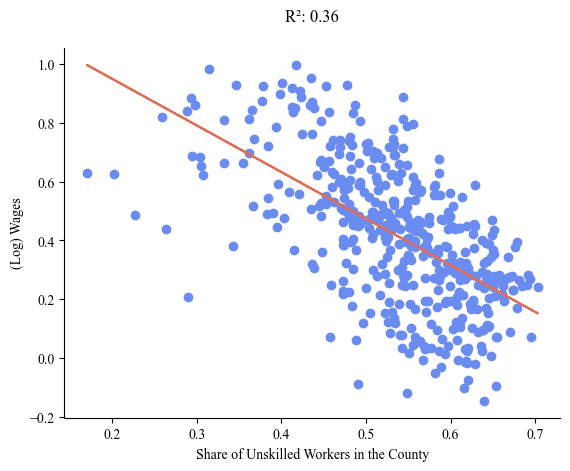

In [111]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import statsmodels.api as sm

# Set the font to Times New Roman
mpl.rcParams["font.family"] = "Times New Roman"

# Your existing code
X = ifo_df["per_unskilled"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
p_value = model.pvalues[0]

# Choosing colors from the coolwarm colormap
scatter_color = cm.coolwarm(0.15)  # blueish
line_color = cm.coolwarm(0.85)     # reddish

plt.scatter(ifo_df["per_unskilled"], ifo_df["weighted_w"], color=scatter_color)
plt.plot(ifo_df["per_unskilled"], model.predict(X), color=line_color)
plt.xlabel("Share of Unskilled Workers in the County")
plt.ylabel("(Log) Wages")
plt.title(f"R²: {r_squared:.2f}\n")

# Remove top and right lines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()